Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](http://https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!


# CoronaVirus Prediction

### Number of Day to Predict 31

In [1]:
num_days_R_prediction=31

In [2]:
#!pip install rpy2
import rpy2
%load_ext rpy2.ipython
%Rpush num_days_R_prediction

In [3]:
%%R
max_days_prediction<-num_days_R_prediction

### Load Data from Github - John Hopkins Institute 

In [4]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)

#url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url_2, error_bad_lines=False)

#url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")

death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")

recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [5]:
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                                 NaN             Afghanistan  33.000000   
1                                 NaN                 Albania  41.153300   
2                                 NaN                 Algeria  28.033900   
3                                 NaN                 Andorra  42.506300   
4                                 NaN                  Angola -11.202700   
5                                 NaN     Antigua and Barbuda  17.060800   
6                                 NaN               Argentina -38.416100   
7                                 NaN                 Armenia  40.069100   
8        Australian Capital Territory               Australia -35.473500   
9                     New South Wales               Australia -33.868800   
10                 Northern Territory               Australia -12.463400   
11                         Queensland               Australia -28.016700   
12                    South Australia               Australia -34.928500   
13                           Tasmania               Australia -41.454500   
14                           Victoria               Australia -37.813600   
15                  Western Australia               Australia -31.950500   
16                                NaN                 Austria  47.516200   
17                                NaN              Azerbaijan  40.143100   
18                                NaN                 Bahamas  25.034300   
19                                NaN                 Bahrain  26.027500   
20                                NaN              Bangladesh  23.685000   
21                                NaN                Barbados  13.193900   
22                                NaN                 Belarus  53.709800   
23                                NaN                 Belgium  50.833300   
24                                NaN                   Benin   9.307700   
25                                NaN                  Bhutan  27.514200   
26                                NaN                 Bolivia -16.290200   
27                                NaN  Bosnia and Herzegovina  43.915900   
28                                NaN                  Brazil -14.235000   
29                                NaN                  Brunei   4.535300   
..                                ...                     ...        ...   
234                               NaN              Mozambique -18.665695   
235                               NaN                   Syria  34.802075   
236                               NaN             Timor-Leste  -8.874217   
237                               NaN                  Belize  13.193900   
238                         Recovered                  Canada   0.000000   
239                               NaN                    Laos  19.856270   
240                               NaN                   Libya  26.335100   
241                               NaN      West Bank and Gaza  31.952200   
242                               NaN           Guinea-Bissau  11.803700   
243                               NaN                    Mali  17.570692   
244                               NaN   Saint Kitts and Nevis  17.357822   
245             Northwest Territories                  Canada  64.825500   
246                             Yukon                  Canada  64.282300   
247                               NaN                  Kosovo  42.602636   
248                               NaN                   Burma  21.916200   
249                          Anguilla          United Kingdom  18.220600   
250            British Virgin Islands          United Kingdom  18.420700   
251          Turks and Caicos Islands          United Kingdom  21.694000   
252                               NaN              MS Zaandam   0.000000   
253                               NaN                Botswana -22.328500   
254                               NaN                 Burundi  -3.37310

## Get Population

In [6]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/data/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [7]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                                 NaN             Afghanistan  33.000000   
1                                 NaN                 Albania  41.153300   
2                                 NaN                 Algeria  28.033900   
3                                 NaN                 Andorra  42.506300   
4                                 NaN                  Angola -11.202700   
5                                 NaN     Antigua and Barbuda  17.060800   
6                                 NaN               Argentina -38.416100   
7                                 NaN                 Armenia  40.069100   
8        Australian Capital Territory               Australia -35.473500   
9                     New South Wales               Australia -33.868800   
10                 Northern Territory               Australia -12.463400   
11                         Queensland               Australia -28.016700   
12                    South Australia               Australia -34.928500   
13                           Tasmania               Australia -41.454500   
14                           Victoria               Australia -37.813600   
15                  Western Australia               Australia -31.950500   
16                                NaN                 Austria  47.516200   
17                                NaN              Azerbaijan  40.143100   
18                                NaN                 Bahamas  25.034300   
19                                NaN                 Bahrain  26.027500   
20                                NaN              Bangladesh  23.685000   
21                                NaN                Barbados  13.193900   
22                                NaN                 Belarus  53.709800   
23                                NaN                 Belgium  50.833300   
24                                NaN                   Benin   9.307700   
25                                NaN                  Bhutan  27.514200   
26                                NaN                 Bolivia -16.290200   
27                                NaN  Bosnia and Herzegovina  43.915900   
28                                NaN                  Brazil -14.235000   
29                                NaN                  Brunei   4.535300   
..                                ...                     ...        ...   
237                               NaN              Mozambique -18.665695   
238                               NaN                   Syria  34.802075   
239                               NaN             Timor-Leste  -8.874217   
240                               NaN                  Belize  13.193900   
241                         Recovered                  Canada   0.000000   
242                               NaN                    Laos  19.856270   
243                               NaN                   Libya  26.335100   
244                               NaN      West Bank and Gaza  31.952200   
245                               NaN           Guinea-Bissau  11.803700   
246                               NaN                    Mali  17.570692   
247                               NaN   Saint Kitts and Nevis  17.357822   
248             Northwest Territories                  Canada  64.825500   
249                             Yukon                  Canada  64.282300   
250                               NaN                  Kosovo  42.602636   
251                               NaN                   Burma  21.916200   
252                          Anguilla          United Kingdom  18.220600   
253            British Virgin Islands          United Kingdom  18.420700   
254          Turks and Caicos Islands          United Kingdom  21.694000   
255                               NaN              MS Zaandam   0.000000   
256                               NaN                Botswana -22.328500   
257                               NaN                 Burundi  -3.37310

In [8]:
# merge region death
death.iloc[185:195,:]

Province/State                    Country/Region      Lat      Long  \
185            NaN                       Philippines  13.0000  122.0000   
186            NaN                            Poland  51.9194   19.1451   
187            NaN                          Portugal  39.3999   -8.2245   
188            NaN                             Qatar  25.3548   51.1839   
189            NaN                           Romania  45.9432   24.9668   
190            NaN                            Russia  60.0000   90.0000   
191            NaN                            Rwanda  -1.9403   29.8739   
192            NaN                       Saint Lucia  13.9094  -60.9789   
193            NaN  Saint Vincent and the Grenadines  12.9843  -61.2872   
194            NaN                        San Marino  43.9424   12.4578   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  4/10/20  \
185        0        0        0        0        0        0  ...      221   
186        0        0        0        0        0        0  ...      181   
187        0        0        0        0        0        0  ...      435   
188        0        0        0        0        0        0  ...        6   
189        0        0        0        0        0        0  ...      270   
190        0        0        0        0        0        0  ...       94   
191        0        0        0        0        0        0  ...        0   
192        0        0        0        0        0        0  ...        0   
193        0        0        0        0        0        0  ...        0   
194        0        0        0        0        0        0  ...       34   

     4/11/20  4/12/20  4/13/20  4/14/20  4/15/20  4/16/20  4/17/20  \
185      247      297      315      335      349      362      387   
186      208      232      245      263      286      314      332   
187      470      504      535      567      599      629      657   
188        6        7        7        7        7        7        7   
189      291      316      331      351      372      392      411   
190      106      130      148      170      198      232      273   
191        0        0        0        0        0        0        0   
192        0        0        0        0        0        0        0   
193        0        0        0        0        0        0        0   
194       35       35       35       36       36       38       39   

      Population                                 region  
185   104,900,000                       Philippines_nan  
186    37,980,000                            Poland_nan  
187    10,290,000                          Portugal_nan  
188     2,870,256                             Qatar_nan  
189    19,530,000                           Romania_nan  
190   144,500,000                            Russia_nan  
191           NaN                            Rwanda_nan  
192           NaN                       Saint Lucia_nan  
193           NaN  Saint Vincent and the Grenadines_nan  
194        33,916                        San Marino_nan  

[10 rows x 93 columns]

In [9]:
# merge region recover
recover.iloc[175:185,:]

Province/State    Country/Region      Lat      Long  1/22/20  1/23/20  \
175            NaN            Norway  60.4720    8.4689        0        0   
176            NaN              Oman  21.0000   57.0000        0        0   
177            NaN          Pakistan  30.3753   69.3451        0        0   
178            NaN            Panama   8.5380  -80.7821        0        0   
179            NaN  Papua New Guinea  -6.3150  143.9555        0        0   
180            NaN          Paraguay -23.4425  -58.4438        0        0   
181            NaN              Peru  -9.1900  -75.0152        0        0   
182            NaN       Philippines  13.0000  122.0000        0        0   
183            NaN            Poland  51.9194   19.1451        0        0   
184            NaN          Portugal  39.3999   -8.2245        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  4/10/20  4/11/20  4/12/20  \
175        0        0        0        0  ...       32       32       32   
176        0        0        0        0  ...      109      109      109   
177        0        0        0        0  ...      727      762     1028   
178        0        0        0        0  ...       16       17       23   
179        0        0        0        0  ...        0        0        0   
180        0        0        0        0  ...       18       18       22   
181        0        0        0        0  ...     1569     1739     1798   
182        0        0        0        0  ...      140      157      197   
183        0        0        0        0  ...      318      375      439   
184        0        0        0        0  ...      233      266      277   

     4/13/20  4/14/20  4/15/20  4/16/20  4/17/20   Population   \
175       32       32       32       32       32     5,357,000   
176      124      130      131      176      176     4,636,000   
177     1095     1378     1446     1645     1765   197,000,000   
178       29       61       72       75       98     4,299,739   
179        0        0        0        0        0           NaN   
180       22       22       23       30       30     7,111,652   
181     2642     2869     3108     6120     6541    32,870,710   
182      242      295      353      435      487   104,900,000   
183      487      618      668      774      866    37,980,000   
184      277      347      383      493      519    10,290,000   

                   region  
175            Norway_nan  
176              Oman_nan  
177          Pakistan_nan  
178            Panama_nan  
179  Papua New Guinea_nan  
180          Paraguay_nan  
181              Peru_nan  
182       Philippines_nan  
183            Poland_nan  
184          Portugal_nan  

[10 rows x 93 columns]

In [10]:
confirmed.iloc[185:195,:]

Province/State                    Country/Region      Lat      Long  \
185            NaN                       Philippines  13.0000  122.0000   
186            NaN                            Poland  51.9194   19.1451   
187            NaN                          Portugal  39.3999   -8.2245   
188            NaN                             Qatar  25.3548   51.1839   
189            NaN                           Romania  45.9432   24.9668   
190            NaN                            Russia  60.0000   90.0000   
191            NaN                            Rwanda  -1.9403   29.8739   
192            NaN                       Saint Lucia  13.9094  -60.9789   
193            NaN  Saint Vincent and the Grenadines  12.9843  -61.2872   
194            NaN                        San Marino  43.9424   12.4578   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  4/10/20  \
185        0        0        0        0        0        0  ...     4195   
186        0        0        0        0        0        0  ...     5955   
187        0        0        0        0        0        0  ...    15472   
188        0        0        0        0        0        0  ...     2512   
189        0        0        0        0        0        0  ...     5467   
190        0        0        0        0        0        0  ...    11917   
191        0        0        0        0        0        0  ...      118   
192        0        0        0        0        0        0  ...       15   
193        0        0        0        0        0        0  ...       12   
194        0        0        0        0        0        0  ...      344   

     4/11/20  4/12/20  4/13/20  4/14/20  4/15/20  4/16/20  4/17/20  \
185     4428     4648     4932     5223     5453     5660     5878   
186     6356     6674     6934     7202     7582     7918     8379   
187    15987    16585    16934    17448    18091    18841    19022   
188     2728     2979     3231     3428     3711     4103     4663   
189     5990     6300     6633     6879     7216     7707     8067   
190    13584    15770    18328    21102    24490    27938    32008   
191      120      126      127      134      136      138      143   
192       15       15       15       15       15       15       15   
193       12       12       12       12       12       12       12   
194      356      356      356      371      372      426      435   

      Population                                 region  
185   104,900,000                       Philippines_nan  
186    37,980,000                            Poland_nan  
187    10,290,000                          Portugal_nan  
188     2,870,256                             Qatar_nan  
189    19,530,000                           Romania_nan  
190   144,500,000                            Russia_nan  
191           NaN                            Rwanda_nan  
192           NaN                       Saint Lucia_nan  
193           NaN  Saint Vincent and the Grenadines_nan  
194        33,916                        San Marino_nan  

[10 rows x 93 columns]

In [11]:
confirmed.iloc[220:230,:]

Province/State  Country/Region      Lat     Long  1/22/20  1/23/20  \
220          Bermuda  United Kingdom  32.3078 -64.7505        0        0   
221   Cayman Islands  United Kingdom  19.3133 -81.2546        0        0   
222  Channel Islands  United Kingdom  49.3723  -2.3644        0        0   
223        Gibraltar  United Kingdom  36.1408  -5.3536        0        0   
224      Isle of Man  United Kingdom  54.2361  -4.5481        0        0   
225       Montserrat  United Kingdom  16.7425 -62.1874        0        0   
226              NaN  United Kingdom  55.3781  -3.4360        0        0   
227              NaN         Uruguay -32.5228 -55.7658        0        0   
228              NaN   United States  37.0902 -95.7129        1        1   
229              NaN      Uzbekistan  41.3775  64.5853        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  4/10/20  4/11/20  4/12/20  \
220        0        0        0        0  ...       48       48       57   
221        0        0        0        0  ...       45       45       53   
222        0        0        0        0  ...      398      407      431   
223        0        0        0        0  ...      127      129      129   
224        0        0        0        0  ...      201      226      228   
225        0        0        0        0  ...        9        9        9   
226        0        0        0        0  ...    73758    78991    84279   
227        0        0        0        0  ...      473      494      480   
228        2        2        5        5  ...   496535   526396   555313   
229        0        0        0        0  ...      624      767      865   

     4/13/20  4/14/20  4/15/20  4/16/20  4/17/20   Population   \
220       57       57       81       81       83           NaN   
221       53       54       54       60       61           NaN   
222      436      440      447      457      470       173,519   
223      129      129      131      131      132        33,693   
224      242      254      256      284      291        84,939   
225       11       11       11       11       11         4,991   
226    88621    93873    98476   103093   108692    66,440,000   
227      480      483      492      502      502     3,471,150   
228   580619   607670   636350   667801   699706   327,200,000   
229      998     1165     1302     1349     1405    33,363,556   

                             region  
220          United Kingdom_Bermuda  
221   United Kingdom_Cayman Islands  
222  United Kingdom_Channel Islands  
223        United Kingdom_Gibraltar  
224      United Kingdom_Isle of Man  
225       United Kingdom_Montserrat  
226              United Kingdom_nan  
227                     Uruguay_nan  
228               United States_nan  
229                  Uzbekistan_nan  

[10 rows x 93 columns]

## Create Time Series + Plots

In [12]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [13]:
## JOAO - Fix - Drop Duplicates # Keep Last # Issue With Data source Change from John Hopkins institute
#
ts=create_ts(confirmed.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_d=create_ts(death.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_rec=create_ts(recover.drop_duplicates(subset=['region'], keep='last', inplace=False) )

In [14]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
plt.show()

No handles with labels found to put in legend.


<Figure size 640x480 with 1 Axes>

Text(0.5, 1.0, 'Daily Total Recoverd - Major_4,25 2nd Areas')

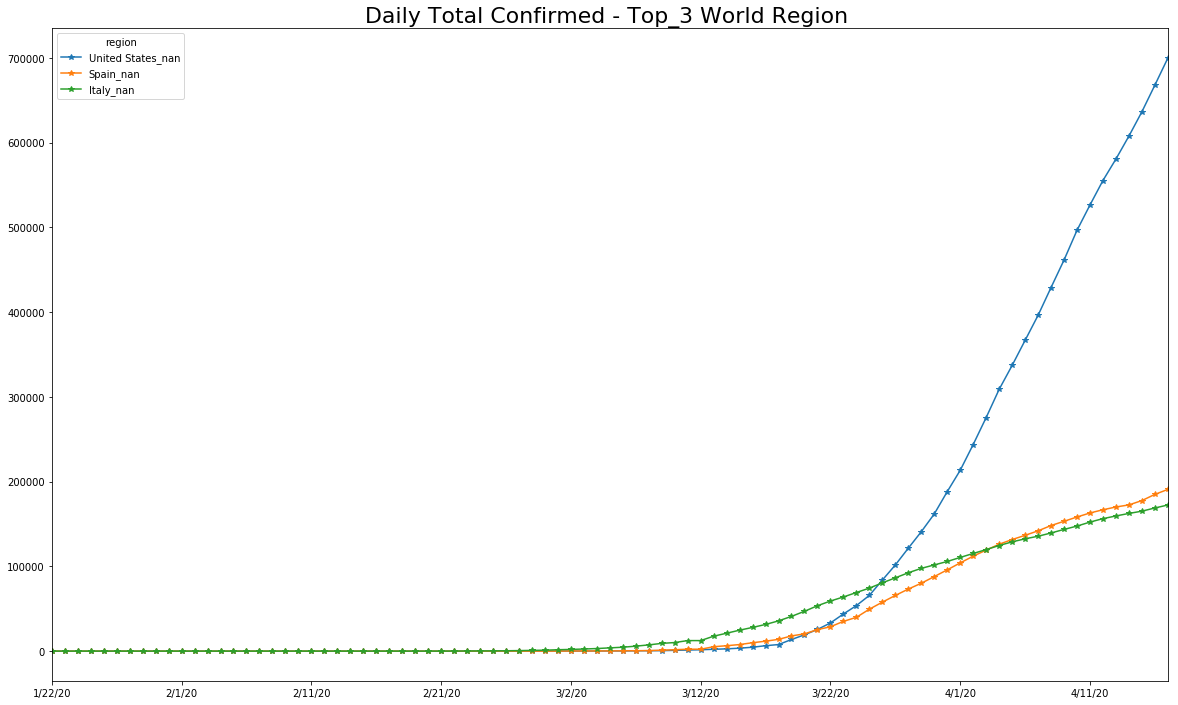

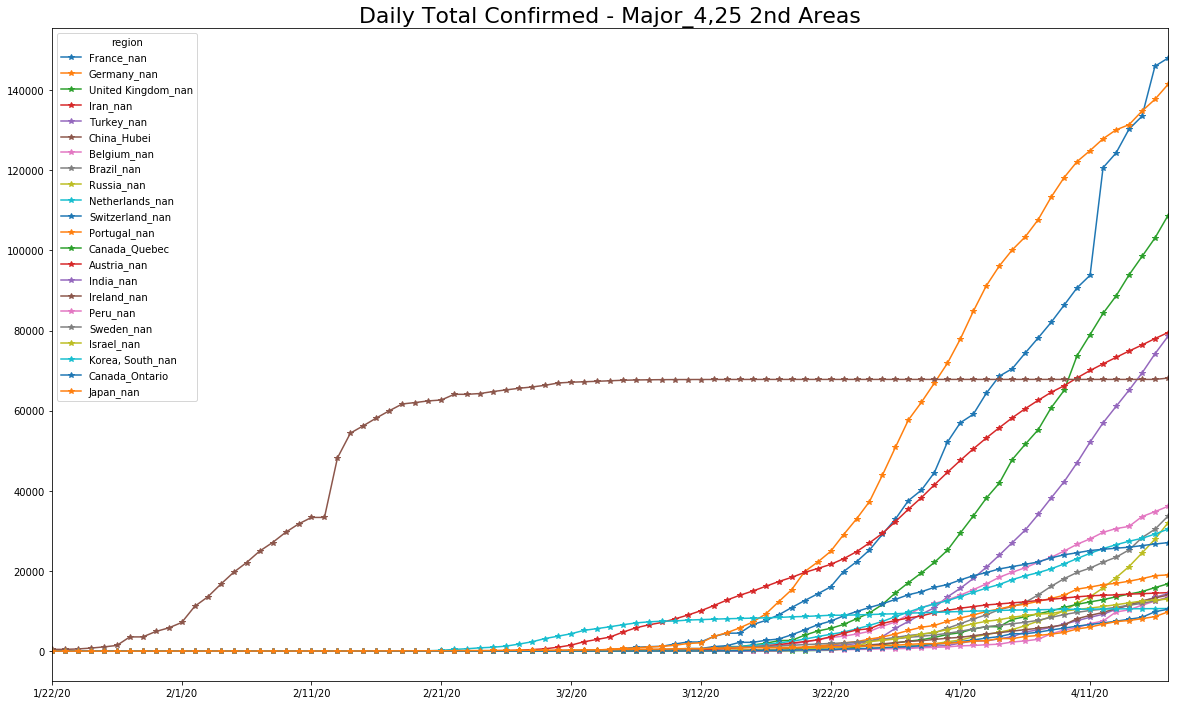

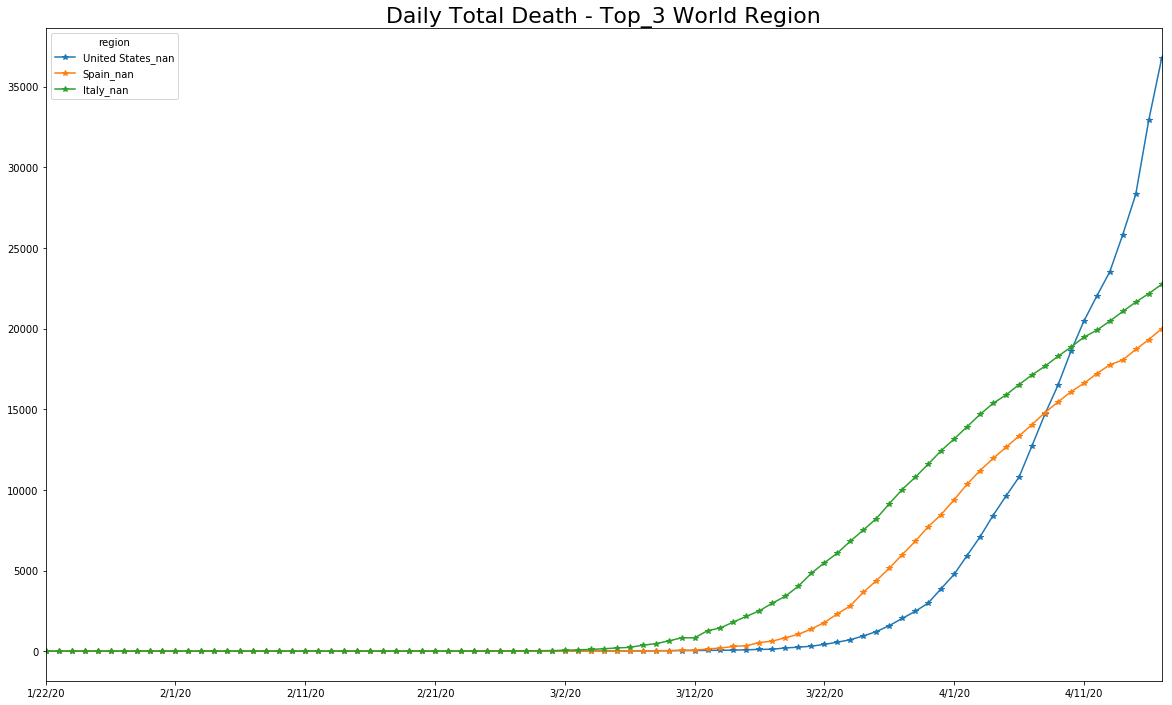

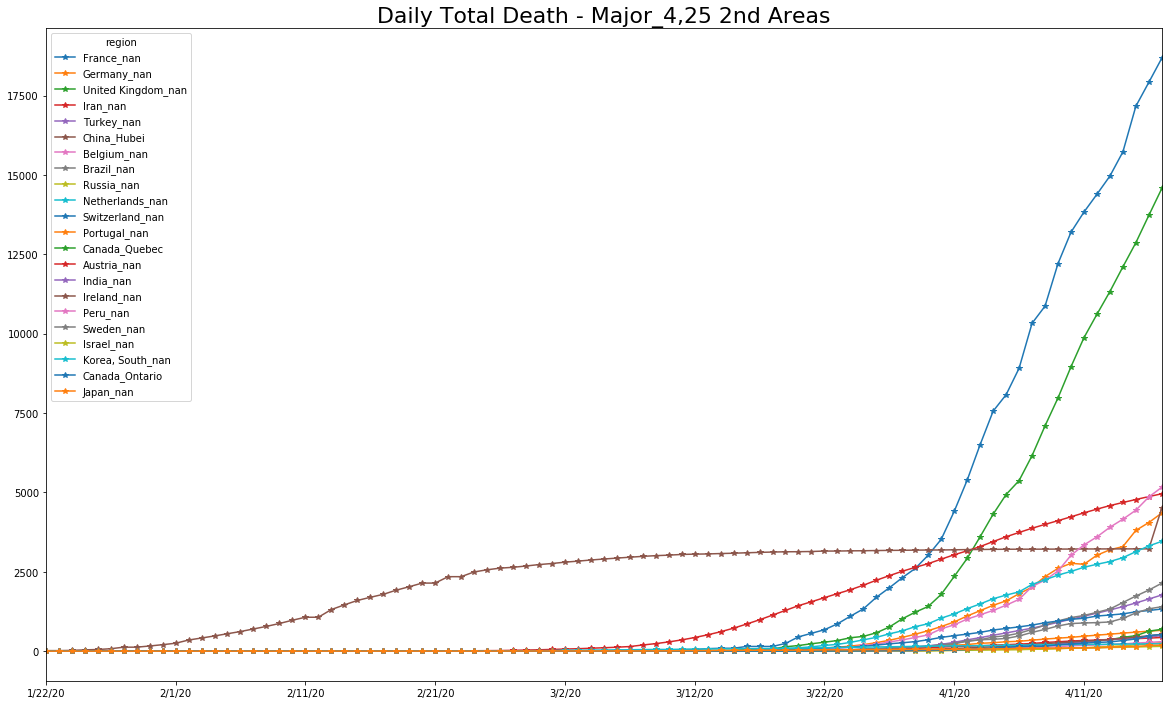

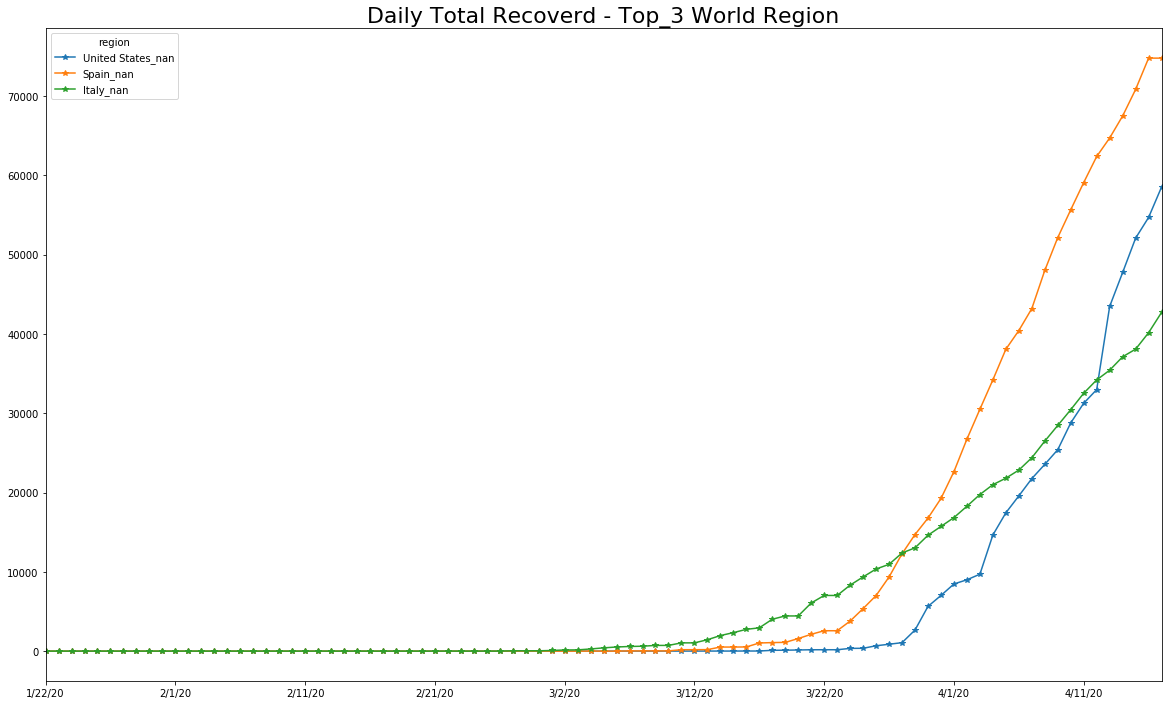

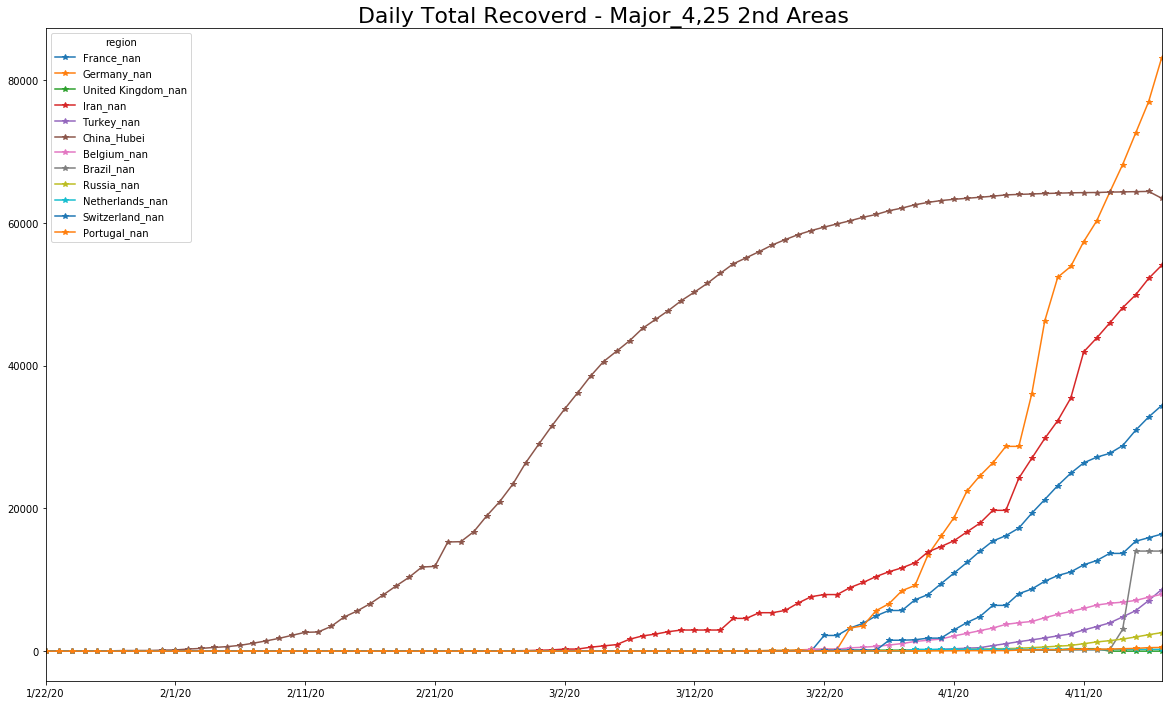

In [15]:
#
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Total Confirmed - Top_3 World Region ',fontdict={'fontsize': 22})
p.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Total Confirmed - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Total Death - Top_3 World Region',fontdict={'fontsize': 22})
p_d.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Total Death - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Total Recoverd - Top_3 World Region',fontdict={'fontsize': 22})
p_r.iloc[:,3:15].plot(marker='*',figsize=(20,12)).set_title('Daily Total Recoverd - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

### Extract Weather Data

In [16]:
#!pip install pyweatherbit
#
from weatherbit.api import Api
import json  
import pandas as pd  
from pandas.io.json import json_normalize 

### API - Joao
from datetime import datetime

#
#api_key="46f953cbca334ea1b85ab5d47dbc9aa0" # joao@fuelbigdata.com
api_key="27a4e12ebc7f41b2bd6e300015f1a090" # jpacerqueira.consult.bigdata@gmail.com
#

api = Api(api_key)
api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.

#api.get_forecast(lat='Lat', lon='Lon')
#my_end_date=datetime.today().strftime('%Y-%m-%d')

#### United Kingdom
#lat1='55.378100'
#lon1='-3.436000'
#api.get_history(lat=lat1,lon=lon1, start_date='2020-03-29',end_date=my_end_date)


In [17]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Portugal_nan',
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
        'Poland_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      #  'Australia_Queensland',
      #  'Australia_South Australia', 'Australia_Victoria', 
        'Brazil_nan',
      #  'Cambodia_nan',
      #  'Canada_British Columbia',
        'Canada_Ontario',
        'Canada_Quebec',
      #  'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      #  'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
    #   'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
        'Taiwan*_nan',
        'Turkey_nan', 
        'Vietnam_nan',
       ]
#

#### Weather History

In [18]:
# ################## already done since API is limited to 500 call per day
## consume Wether data From 15/03/2020 forward to end_date=30/03/2020
#
### Location in confirmed array to start in pos 1='Albania_nan' 61 = 'China_Hong Kong'
### Only run for Countries in above : my_train_list 
vpos=len(confirmed.iloc[1])-1 #90# 89 #88 #87 #86 #85 #84 #83 #82 #81 #80 #79 #78 #77 #76 #75 #74 #1 #73
print('vpos=',vpos)
print('xcountry_region='+confirmed.iloc[1,vpos])

my_weather_fetch_list= my_train_list # ['Canada_Quebec'] #  ['Iran_nan'] #['Brazil_nan'] #

start_date_init=pd.to_datetime('today').strftime('%Y/%m/%d') #'2020-04-17'
offset_days=0 #-1 to start yesterday pick today # API free-tier just picks one per api call!
max_days=1

w=pd.DataFrame(columns=['date','region','min','max'])
for h in range(0,max_days):
    offset_days=h
    start_date=pd.to_datetime(start_date_init)
    #
    end_date=(start_date+pd.DateOffset(days=offset_days+1)).strftime('%Y-%m-%d')
    start_date=(start_date+pd.DateOffset(days=offset_days)).strftime('%Y-%m-%d')
    prnt_start_date=pd.to_datetime(start_date).strftime('%Y/%m/%d')
    prnt_end_date=pd.to_datetime(end_date).strftime('%Y/%m/%d')
    #
    for i in range (1,len(confirmed)):
        if confirmed.iloc[i,vpos] not in my_weather_fetch_list:
            continue
        if confirmed.iloc[i,vpos] in my_weather_fetch_list:
            #
            # Clean JSON structure return from API Call
            jas=""
            jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date,end_date=end_date).json
            if (((json_normalize(jas['data'])['min_temp'].values[0])=='')
                 or (np.isnan((json_normalize(jas['data'])['min_temp'].values[0])) == True )):
                continue
            try:
                w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
            except Exception:
                w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':None,'max':None}, ignore_index=True)
#        
#
table_columns=['date','region','min','max']
w = w[w.columns.intersection(table_columns)]

vpos= 92
xcountry_region=Albania_nan


HTTPError: 429 Client Error:  for url: https://api.weatherbit.io/v2.0/history/daily?key=27a4e12ebc7f41b2bd6e300015f1a090&lat=-33.8688&lon=151.2093&start_date=2020-04-18&end_date=2020-04-19

In [19]:
w.to_csv('data/w_v2_v227.csv', index = False, header=True)

In [20]:
w[:]

Empty DataFrame
Columns: [date, region, min, max]
Index: []

## Kalman Filter With R

In [21]:
# Joao - FIX - Improve Performance 
### Drop the Months of Jan and Feb < 20/02 as
### they are too in the Past and model no longuer trains in China Hubei

ntake=25
ts=ts[ntake:]
ts_d=ts_d[ntake:]
ts_rec=ts_rec[ntake:]

In [22]:
ts[-4:-1]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
4/14/20              714          475         2070          659          19   
4/15/20              784          494         2160          673          19   
4/16/20              840          518         2268          673          19   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
4/14/20                       23           2277         1067   
4/15/20                       23           2443         1111   
4/16/20                       23           2571         1159   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
4/14/20                                     103                       2870   
4/15/20                                     103                       2886   
4/16/20                                     103                       2897   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Venezuela_nan  \
4/14/20  ...             607670          483            1165            189   
4/15/20  ...             636350          492            1302            197   
4/16/20  ...             667801          502            1349            204   

region   Vietnam_nan  West Bank and Gaza_nan  Western Sahara_nan  Yemen_nan  \
4/14/20          266                     308                   6          1   
4/15/20          267                     374                   6          1   
4/16/20          268                     374                   6          1   

region   Zambia_nan  Zimbabwe_nan  
4/14/20          45            17  
4/15/20          48            23  
4/16/20          48            23  

[3 rows x 264 columns]

In [23]:
# Create data for R script
ts_conf=ts.reset_index()
ts_conf=ts_conf.rename(columns = {'index':'date'})
ts_conf['date']=pd.to_datetime(ts_conf['date'] ,errors ='coerce')
ts_conf.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv')

ts_rec=ts_rec.reset_index()
ts_rec=ts_rec.rename(columns = {'index':'date'})
ts_rec['date']=pd.to_datetime(ts_rec['date'] ,errors ='coerce')
ts_rec.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_rec_r.csv')


ts_d=ts_d.reset_index()
ts_d=ts_d.rename(columns = {'index':'date'})
ts_d['date']=pd.to_datetime(ts_d['date'] ,errors ='coerce')
ts_d.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_d_r.csv')


In [24]:
%%R

#install.packages('pracma')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('reshape')

Sys.setenv(TZ='GMT')
Sys.timezone()

[1] "GMT"


In [25]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: Parsed with column specification:
cols(
  .default = col_double(),
  date = col_date(format = "")
)

R[write to console]: See spec(...) for full column specifications.



In [26]:
p=%R pred_all

In [27]:
############ Merge R output due to package problem
### Joao FIX - 
# t=ts_d    -  deaths
# t=ts_rec  -  recovered
# t=ts      -  confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

# JOAO - FIX - temp fixed
# Y,X,X2 nan issue from p revolved

p_pd=pd.DataFrame(p,columns=['Y','X','X2'])

p_pd['nindex'] = range(1, 1+len(p_pd))
temp['nindex']= range(1,1+len(temp))

#temp_1 = temp.join(p_pd)
temp_1 = temp.merge(p_pd, on='nindex', how='inner', suffixes=('_1', '_2')).rename(columns={"Y_2": "Y", "X_2": "X", "X2_2" : "X2"})
temp_1 = temp_1.drop(columns=['Y_1', 'X_1','X2_1','nindex'])


temp=temp_1
temp.to_csv(r'/home/notebookuser/notebooks/covid19/data/temp.csv')

## Pre Proccessing Data for ML Model

### Extract Weather Forecast Data

In [28]:
#
### Joao - Test Later Weather from new file : w_v2.csv and w_v2_v2.csv
w_v2=pd.read_csv('data/w_v2.csv', sep=',', encoding='latin1')
w_v2['date']=pd.to_datetime(w_v2['date'],format='%Y/%m/%d')

w_v2_v2=pd.read_csv('data/w_v2_v2.csv', sep=',', encoding='latin1')
w_v2_v2['date']=pd.to_datetime(w_v2_v2['date'],format='%Y/%m/%d')

w_v2_v227=pd.read_csv('data/w_v2_v227-18April2020.csv', sep=',', encoding='latin1')
w_v2_v227['date']=pd.to_datetime(w_v2_v227['date'],format='%Y/%m/%d')

w=pd.read_csv('data/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')

w_forecast=pd.read_csv('data/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

In [29]:
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2).append(w_v2_v227) 
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)

w_total.to_csv(r'data/w_total.csv', index = False, header=True)

In [30]:
w_in_model=pd.read_csv('/home/notebookuser/notebooks/covid19/data/w_total.csv', sep=',', encoding='latin1')
w_in_model['date']=pd.to_datetime(w_in_model['date'],format='%Y/%m/%d')
#
w_in_model.to_csv(r'data/w_in_model.csv', index = False, header=True)

In [31]:
 ###Joao - FiX - Weather bullet proof
##
#######w=w_in_model ### test_iter ... depends in original weather only , now w_in_model
##
### Append Weather fetched now to file w_v2_v2
w_n_forward=w_v2_v2.append(w_v2_v227) 
w_n_forward=w_n_forward.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_n_forward=w_n_forward.sort_values(by=['region','date'], ascending=True)
w_n_forward.to_csv(r'data/w_v2_v2.csv', index = False, header=True)

w=w
w_forecast=w_forecast
w_in_model=w_in_model ### test_iter issues 1
w_n_forward=w_n_forward ### test_iter issue 2


In [32]:
w_in_model.tail(2)

date       region   min   max
6094 2020-04-17  Vietnam_nan  24.0  31.0
6095 2020-04-18  Vietnam_nan  24.0  31.0

In [33]:
w.tail(2)

date       region   min   max
3228 2020-02-28  Vietnam_nan  18.0  27.0
3229 2020-02-29  Vietnam_nan  19.0  27.0

In [34]:
w_forecast.tail(2)

date       region   min   max
2851 2020-03-12  Vietnam_nan  23.6  28.2
2852 2020-03-13  Vietnam_nan  22.9  28.4

### Build Train Set Data Structure

In [35]:
### JOAO - Fix -
## t=ts confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [36]:
### JOAO - Fix -
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
#
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
for i in range(1,len(t)):
    if(t.iloc[i,1] is t.iloc[i-2,1]):
        t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
        t.iloc[i,6]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-2,2]*100 -1 +1))*100
        t.iloc[i,9]=t.iloc[i-1,2]
    if(t.iloc[i,1] is t.iloc[i-4,1]):
        t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
        t.iloc[i,7]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-4,2]*100 -1 +1))*100
    if(t.iloc[i,1] is t.iloc[i-8,1]):
        t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
        t.iloc[i,8]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-8,2]*100 -1 +1))*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)

### Joao - Fix NaN Kalman_Filter
t['kalman_prediction']=np.nan_to_num(t['kalman_prediction'])
t['kalman_prediction']=round(t['kalman_prediction'])

#
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(10000000) ### Fill 10M if nan
train['population']=train['population'].astype('int32')
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
# train['infected_rate']=train['last_day']/train['population']*10000
train['infected_rate']=(((train['last_day'] +1)*100)/((train['population'] +1)*100000) *10)
#
#### Joao , merge w weather only !?!
##train=train.merge(w,how='left',on=['date','region'])
train=train.merge(w_in_model,how='left',on=['date','region'])
#
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
    if(np.isnan(train.iloc[i,13])):
        if(train.iloc[i,1] is train.iloc[i-1,1]):
            train.iloc[i,13]=train.iloc[i-1,13]
            train.iloc[i,14]=train.iloc[i-1,14]

/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in long_scalars
  from ipykernel import kernelapp as app


In [37]:
# Joao - Fix - Nulls are an issue
train_notnull=train[train['kalman_prediction'] != 0.0 ] #.any(axis=1)]
train_notnull[:]

date           region  confirmed  1_day_change  3_day_change  \
9     2020-02-25  Afghanistan_nan          1             1             1   
10    2020-02-26  Afghanistan_nan          1             0             1   
11    2020-02-27  Afghanistan_nan          1             0             1   
12    2020-02-28  Afghanistan_nan          1             0             0   
13    2020-02-29  Afghanistan_nan          1             0             0   
14    2020-03-01  Afghanistan_nan          1             0             0   
15    2020-03-02  Afghanistan_nan          1             0             0   
16    2020-03-03  Afghanistan_nan          1             0             0   
17    2020-03-04  Afghanistan_nan          1             0             0   
18    2020-03-05  Afghanistan_nan          1             0             0   
19    2020-03-06  Afghanistan_nan          1             0             0   
20    2020-03-07  Afghanistan_nan          1             0             0   
21    2020-03-08  Afghanistan_nan          4             0             0   
22    2020-03-09  Afghanistan_nan          4             3             3   
23    2020-03-10  Afghanistan_nan          5             0             3   
24    2020-03-11  Afghanistan_nan          7             1             4   
25    2020-03-12  Afghanistan_nan          7             2             3   
26    2020-03-13  Afghanistan_nan          7             0             3   
27    2020-03-14  Afghanistan_nan         11             0             2   
28    2020-03-15  Afghanistan_nan         16             4             4   
29    2020-03-16  Afghanistan_nan         21             5             9   
30    2020-03-17  Afghanistan_nan         22             5            14   
31    2020-03-18  Afghanistan_nan         22             1            11   
32    2020-03-19  Afghanistan_nan         22             0             6   
33    2020-03-20  Afghanistan_nan         24             0             1   
34    2020-03-21  Afghanistan_nan         24             2             2   
35    2020-03-22  Afghanistan_nan         40             0             2   
36    2020-03-23  Afghanistan_nan         40            16            18   
37    2020-03-24  Afghanistan_nan         74             0            16   
38    2020-03-25  Afghanistan_nan         84            34            50   
...          ...              ...        ...           ...           ...   
16757 2020-04-18       Zambia_nan          0             4             7   
16792 2020-03-21     Zimbabwe_nan          3             1             1   
16793 2020-03-22     Zimbabwe_nan          3             2             3   
16794 2020-03-23     Zimbabwe_nan          3             0             3   
16795 2020-03-24     Zimbabwe_nan          3             0             2   
16796 2020-03-25     Zimbabwe_nan          3             0             0   
16797 2020-03-26     Zimbabwe_nan          3             0             0   
16798 2020-03-27     Zimbabwe_nan          5             0             0   
16799 2020-03-28     Zimbabwe_nan          7             2             2   
16800 2020-03-29     Zimbabwe_nan          7             2             4   
16801 2020-03-30     Zimbabwe_nan          7             0             4   
16802 2020-03-31     Zimbabwe_nan          8             0             2   
16803 2020-04-01     Zimbabwe_nan          8             1             1   
16804 2020-04-02     Zimbabwe_nan          9             0             1   
16805 2020-04-03     Zimbabwe_nan          9             1             2   
16806 2020-04-04     Zimbabwe_nan          9             0             1   
16807 2020-04-05     Zimbabwe_nan          9             0             1   
16808 2020-04-06     Zimbabwe_nan         10             0             0   
16809 2020-04-07     Zimbabwe_nan         11             1             1   
16810 2020-04-08     Zimbabwe_nan         11             1             2   
16811 2020-04-09     Zimbabwe_nan         11             0  

In [38]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train['kalman_prediction'].isnull() ] #.any(axis=1)]
train_nulls[:]

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [39]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train.isnull().any(axis=1)]
train_nulls[:]

date           region  confirmed  1_day_change  3_day_change  \
0     2020-02-16  Afghanistan_nan          0             0             0   
1     2020-02-17  Afghanistan_nan          0             0             0   
63    2020-02-16      Albania_nan          0             0             0   
64    2020-02-17      Albania_nan          0             0             0   
65    2020-02-18      Albania_nan          0             0             0   
66    2020-02-19      Albania_nan          0             0             0   
67    2020-02-20      Albania_nan          0             0             0   
68    2020-02-21      Albania_nan          0             0             0   
69    2020-02-22      Albania_nan          0             0             0   
70    2020-02-23      Albania_nan          0             0             0   
71    2020-02-24      Albania_nan          0             0             0   
72    2020-02-25      Albania_nan          0             0             0   
73    2020-02-26      Albania_nan          0             0             0   
74    2020-02-27      Albania_nan          0             0             0   
75    2020-02-28      Albania_nan          0             0             0   
76    2020-02-29      Albania_nan          0             0             0   
77    2020-03-01      Albania_nan          0             0             0   
78    2020-03-02      Albania_nan          0             0             0   
79    2020-03-03      Albania_nan          0             0             0   
80    2020-03-04      Albania_nan          0             0             0   
81    2020-03-05      Albania_nan          0             0             0   
82    2020-03-06      Albania_nan          0             0             0   
83    2020-03-07      Albania_nan          0             0             0   
84    2020-03-08      Albania_nan          0             0             0   
85    2020-03-09      Albania_nan          2             0             0   
86    2020-03-10      Albania_nan         10             2             2   
87    2020-03-11      Albania_nan         12             8            10   
88    2020-03-12      Albania_nan         23             2            12   
89    2020-03-13      Albania_nan         33            11            21   
90    2020-03-14      Albania_nan         38            10            23   
...          ...              ...        ...           ...           ...   
16791 2020-03-20     Zimbabwe_nan          1             0             0   
16792 2020-03-21     Zimbabwe_nan          3             1             1   
16793 2020-03-22     Zimbabwe_nan          3             2             3   
16794 2020-03-23     Zimbabwe_nan          3             0             3   
16795 2020-03-24     Zimbabwe_nan          3             0             2   
16796 2020-03-25     Zimbabwe_nan          3             0             0   
16797 2020-03-26     Zimbabwe_nan          3             0             0   
16798 2020-03-27     Zimbabwe_nan          5             0             0   
16799 2020-03-28     Zimbabwe_nan          7             2             2   
16800 2020-03-29     Zimbabwe_nan          7             2             4   
16801 2020-03-30     Zimbabwe_nan          7             0             4   
16802 2020-03-31     Zimbabwe_nan          8             0             2   
16803 2020-04-01     Zimbabwe_nan          8             1             1   
16804 2020-04-02     Zimbabwe_nan          9             0             1   
16805 2020-04-03     Zimbabwe_nan          9             1             2   
16806 2020-04-04     Zimbabwe_nan          9             0             1   
16807 2020-04-05     Zimbabwe_nan          9             0             1   
16808 2020-04-06     Zimbabwe_nan         10             0             0   
16809 2020-04-07     Zimbabwe_nan         11             1             1   
16810 2020-04-08     Zimbabwe_nan         11             1             2   
16811 2020-04-09     Zimbabwe_nan         11             0  

In [40]:
train.to_csv(r'data/train.csv', index = False, header=True)

## Kalman 1 day Prediction with Evaluation

                region           mse          rmse           mae
254  United States_nan  8.570018e+09  92574.391391  15696.177419


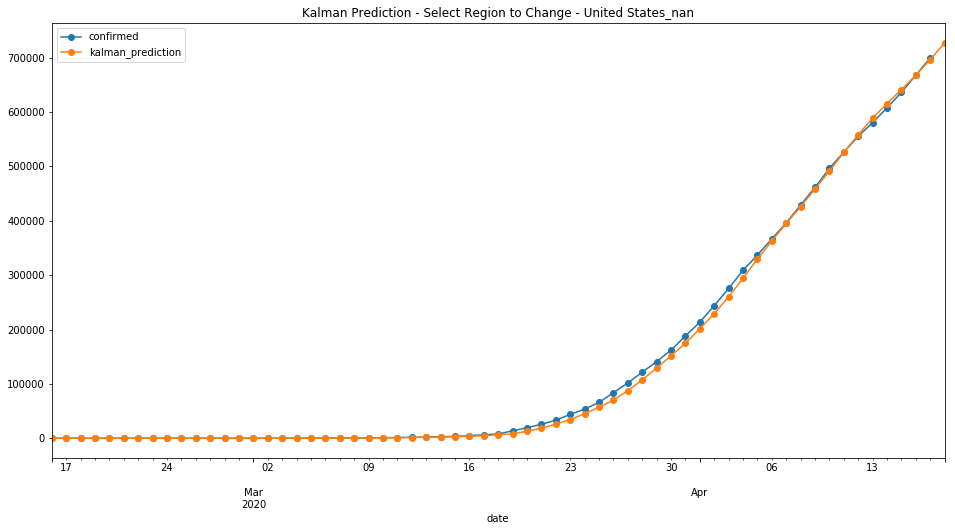

In [41]:
# Select region
region='United States_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [42]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='5G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.6" 2020-01-14; OpenJDK Runtime Environment (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1, mixed mode, sharing)
  Starting server from /home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp0dn43x3z
  JVM stdout: /tmp/tmp0dn43x3z/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp0dn43x3z/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


--------------------------  ----------------------------------------
H2O cluster uptime:         01 secs
H2O cluster timezone:       Etc/GMT
H2O data parsing timezone:  UTC
H2O cluster version:        3.22.0.1
H2O cluster version age:    1 year, 5 months and 23 days !!!
H2O cluster name:           H2O_from_python_unknownUser_dhqtus
H2O cluster total nodes:    1
H2O cluster free memory:    5 Gb
H2O cluster total cores:    8
H2O cluster allowed cores:  8
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.7.3 final
--------------------------  ----------------------------------------

In [43]:

train=train.fillna(0) 

######################################################## - Old Training manual

### Joao - Training  progression - When growth happened 2020/03/05 to 2020/04/12
### Joao - FIX - Refresh this daily forward

### Old Fixed manual ### Last run 17April2020
##
#train_df=train[train['date']>'2020-03-04']
#train_df=train[train['date']<'2020-04-16']
#boots=train_df[train_df['date']>='2020-04-08'] # some bootstrap to give more weight for recent days
#train_df=train_df.append([boots[boots['date']>='2020-04-12']]*1000,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
#region_to_train=my_train_list
#train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
#test=train[train['date']>='2020-04-03']
#test=test[test['date']<'2020-04-17']
#test_v2=test[test['region'].isin(region_to_train)]
#valid_v2=test_v2[test_v2['date']>='2020-04-16']

######################################################## - New Training automated



to_day=pd.to_datetime('today')
first_train_date=(to_day+pd.DateOffset(days=-49)).strftime('%Y-%m-%d')
last_train_date=(to_day+pd.DateOffset(days=-1)).strftime('%Y-%m-%d')
first_bootstrap_date=(to_day+pd.DateOffset(days=-9)).strftime('%Y-%m-%d')
boost_bootstrap_date=(to_day+pd.DateOffset(days=-4)).strftime('%Y-%m-%d')
first_test_date=(to_day+pd.DateOffset(days=-10)).strftime('%Y-%m-%d')
last_test_date=to_day.strftime('%Y-%m-%d')
print('first_train_date=',first_train_date)
print('last_train_date=',last_train_date)
print('first_bootstrap_date=',first_bootstrap_date)
print('boost_bootstrap_date=',boost_bootstrap_date)
print('first_test_date=',first_test_date)
print('last_test_date=',last_test_date)

train_df=train[train['date']>first_train_date]
train_df=train[train['date']<last_train_date]
boots=train_df[train_df['date']>=first_bootstrap_date] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>=boost_bootstrap_date]]*1000,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
region_to_train=my_train_list
train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
test=train[train['date']>=first_test_date]
test=test[test['date']<=last_test_date]
test_v2=test[test['region'].isin(region_to_train)]
valid_v2=test_v2[test_v2['date']>=last_train_date]


first_train_date= 2020-02-29
last_train_date= 2020-04-17
first_bootstrap_date= 2020-04-09
boost_bootstrap_date= 2020-04-14
first_test_date= 2020-04-08
last_test_date= 2020-04-18


In [44]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
            '1_day_change_rate', 
            '3_day_change_rate',
            '7_day_change_rate', 
            'last_day',
            'kalman_prediction',
            'infected_rate', 'min', 'max'
          ]

In [45]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values


In [46]:
pred2.iloc[175:195]

0  confirmed       date                       region
175    537.0          0 2020-04-18  Australia_Western Australia
176  13026.0      12942 2020-04-08                  Austria_nan
177  13274.0      13244 2020-04-09                  Austria_nan
178  13544.0      13555 2020-04-10                  Austria_nan
179  13849.0      13806 2020-04-11                  Austria_nan
180  14099.0      13945 2020-04-12                  Austria_nan
181  14210.0      14041 2020-04-13                  Austria_nan
182  14308.0      14226 2020-04-14                  Austria_nan
183  14501.0      14336 2020-04-15                  Austria_nan
184  14559.0      14476 2020-04-16                  Austria_nan
185  14660.0      14595 2020-04-17                  Austria_nan
186  14747.0          0 2020-04-18                  Austria_nan
187    785.0        822 2020-04-08               Azerbaijan_nan
188    898.0        926 2020-04-09               Azerbaijan_nan
189   1007.0        991 2020-04-10               Azerbaijan_nan
190   1066.0       1058 2020-04-11               Azerbaijan_nan
191   1130.0       1098 2020-04-12               Azerbaijan_nan
192   1169.0       1148 2020-04-13               Azerbaijan_nan
193   1222.0       1197 2020-04-14               Azerbaijan_nan
194   1270.0       1253 2020-04-15               Azerbaijan_nan

In [47]:
pred2.iloc[220:240]

0  confirmed       date          region
220   210.0        218 2020-04-08  Bangladesh_nan
221   280.0        330 2020-04-09  Bangladesh_nan
222   427.0        424 2020-04-10  Bangladesh_nan
223   539.0        482 2020-04-11  Bangladesh_nan
224   585.0        621 2020-04-12  Bangladesh_nan
225   752.0        803 2020-04-13  Bangladesh_nan
226   959.0       1012 2020-04-14  Bangladesh_nan
227  1182.0       1231 2020-04-15  Bangladesh_nan
228  1414.0       1572 2020-04-16  Bangladesh_nan
229  1790.0       1838 2020-04-17  Bangladesh_nan
230  2053.0          0 2020-04-18  Bangladesh_nan
231    67.0         63 2020-04-08    Barbados_nan
232    67.0         66 2020-04-09    Barbados_nan
233    63.0         67 2020-04-10    Barbados_nan
234    63.0         68 2020-04-11    Barbados_nan
235    64.0         71 2020-04-12    Barbados_nan
236    66.0         72 2020-04-13    Barbados_nan
237    67.0         72 2020-04-14    Barbados_nan
238    65.0         73 2020-04-15    Barbados_nan
239    66.0         75 2020-04-16    Barbados_nan

In [48]:
#
train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_v2 = h2o.H2OFrame(train_df_v2) # different model for V2 region ### Spain This time


test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)
test_h20_v2 = h2o.H2OFrame(test_v2)

valid_h20_v2=h2o.H2OFrame(valid_v2)


training_columns = ['region','1_day_change', '3_day_change', '7_day_change', '1_day_change_rate', '3_day_change_rate',
                    '7_day_change_rate', 'last_day', 'kalman_prediction','infected_rate', 'min', 'max'
                   ]                 
# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Model V2
model_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=17)
model_v2.train(x=training_columns, y=response_column, training_frame=train_h20_v2, validation_frame=valid_h20_v2)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%


In [49]:
#Print Model

print('# MSE on the training data = ',model_v2.mse())
print('# MSE on the validation data = ',model_v2.mse(valid=True))
print('# R^2 on the training data = ',model_v2.r2())
print('# R^2 on the validation data',model_v2.r2(valid=True))

# MSE on the training data =  235883.12933473266
# MSE on the validation data =  7679124088.010158
# R^2 on the training data =  0.9999804167234204
# R^2 on the validation data 0.04419675057665384


In [50]:
model_v2.show()

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1587248691712_1


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 235883.12933473266
RMSE: 485.67800993531984
MAE: 13.03845195083397
RMSLE: 0.09817503750642162
Mean Residual Deviance: 235883.12933473266

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 7679124088.010158
RMSE: 87630.61159212663
MAE: 28016.46990447041
RMSLE: 6.746876056308116
Mean Residual Deviance: 7679124088.010158
Scoring History: 


timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance    validation_rmse    validation_mae      validation_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------  -----------------  ------------------  ---------------------
     2020-04-18 22:25:22  0.164 sec   0.0                nan                 nan                 nan                  nan                nan                 nan
     2020-04-18 22:25:23  0.754 sec   1.0                816.1514700899603   19.728893943605325  666103.2221300034    87961.37602525328  28801.31447347005   7737203672.256001
     2020-04-18 22:25:23  0.967 sec   2.0                661.7582005228787   24.867340005091727  437923.9159592786    89122.96812040305  28551.205522325305  7942903446.590378
     2020-04-18 22:25:23  1.163 sec   3.0                722.659808813712    24.08347040353218   522237.19927467074   89664.88057535625  29304.179109926583  8039790808.592899
     2020-04-18 22:25:23  1.343 sec   4.0                973.3342676655893   23.74236474421615   947379.596612109     89735.27355918809  28880.380830552844  8052419320.742321
---  ---                  ---         ---                ---                 ---                 ---                  ---                ---                 ---
     2020-04-18 22:25:38  16.252 sec  256.0              476.97471410941034  13.432818468107582  227504.87789975372   87879.60113057945  28044.823605371323  7722824294.869742
     2020-04-18 22:25:42  20.302 sec  328.0              473.65325247436937  13.253748457826408  224347.4035795487    87756.43892055193  28059.073434026734  7701192572.016561
     2020-04-18 22:25:46  24.347 sec  406.0              482.8909261134434   12.925395144021683  233183.64652269907   87663.156451839    28032.16880209138   7684828999.099601
     2020-04-18 22:25:50  28.358 sec  481.0              492.2900848185437   13.112691246717182  242349.52761064892   87613.57762396621  28017.47777839639   7676138984.070753
     2020-04-18 22:25:52  29.598 sec  500.0              485.67800993531984  13.03845195083397   235883.12933473266   87630.61159212663  28016.46990447041   7679124088.010158


See the whole table with table.as_data_frame()
Variable Importances: 


variable           relative_importance    scaled_importance    percentage
-----------------  ---------------------  -------------------  ------------
7_day_change       1.85484e+17            1                    0.303438
kalman_prediction  1.61655e+17            0.87153              0.264455
last_day           1.19802e+17            0.645891             0.195988
3_day_change       5.48063e+16            0.295478             0.0896592
1_day_change       4.55005e+16            0.245307             0.0744355
region             3.44897e+16            0.185945             0.0564227
infected_rate      8.08444e+15            0.0435857            0.0132256
max                7.67373e+14            0.00413715           0.00125537
min                2.36475e+14            0.00127491           0.000386856
1_day_change_rate  2.28267e+14            0.00123066           0.000373428
7_day_change_rate  1.53859e+14            0.000829499          0.000251701
3_day_change_rate  6.61917e+13            0.00035686           0.000108285

In [51]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao -  Model V2
modlv2=model_v2.varimp(True).iloc[:,:] # Feature importance for Model V2 Global RF
modlv2.sort_values('percentage',ascending=False)

variable  relative_importance  scaled_importance  percentage
0        7_day_change         1.854837e+17           1.000000    0.303438
1   kalman_prediction         1.616547e+17           0.871530    0.264455
2            last_day         1.198022e+17           0.645891    0.195988
3        3_day_change         5.480631e+16           0.295478    0.089659
4        1_day_change         4.550046e+16           0.245307    0.074435
5              region         3.448975e+16           0.185945    0.056423
6       infected_rate         8.084441e+15           0.043586    0.013226
7                 max         7.673732e+14           0.004137    0.001255
8                 min         2.364747e+14           0.001275    0.000387
9   1_day_change_rate         2.282671e+14           0.001231    0.000373
10  7_day_change_rate         1.538585e+14           0.000829    0.000252
11  3_day_change_rate         6.619174e+13           0.000357    0.000108

In [52]:
## Joao - Model Predictions - Country_nan _v2
performance = model_v2.model_performance(test_data=test_h20_v2)
# # Model Create Predictions
pred=model_v2.predict(test_h20_v2);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test_v2['confirmed'].values
pred['date']=test_v2['date'].values
pred['region']=test_v2['region'].values

drf prediction progress: |████████████████████████████████████████████████| 100%


## Correlation Matrix And Temperature

Correlation Matrix


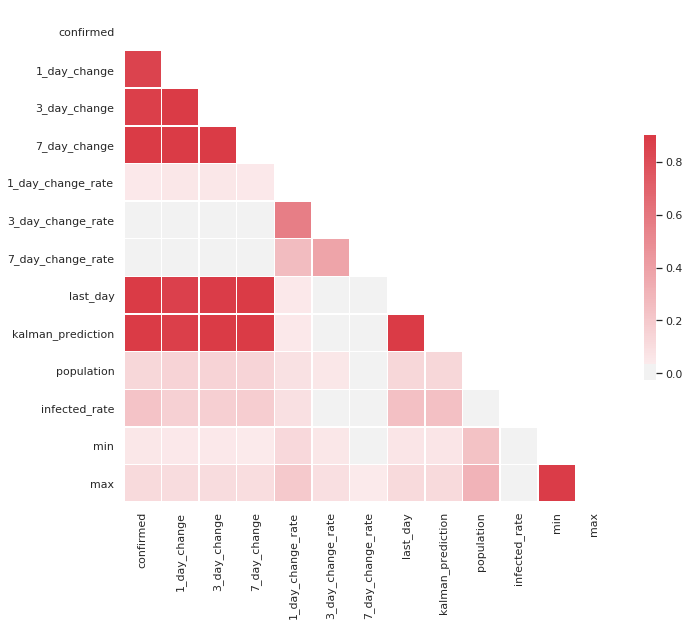

In [53]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [54]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.856648
3_day_change         0.877883
7_day_change         0.907413
1_day_change_rate    0.048922
3_day_change_rate    0.017171
7_day_change_rate    0.000312
last_day             0.943475
kalman_prediction    0.945519
population           0.129513
infected_rate        0.229104
min                  0.058344
max                  0.115285
Name: confirmed, dtype: float64


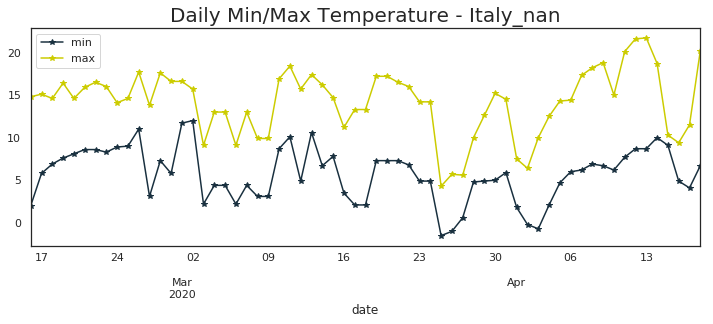

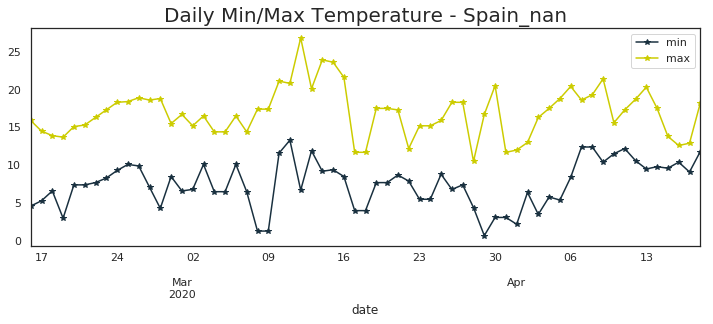

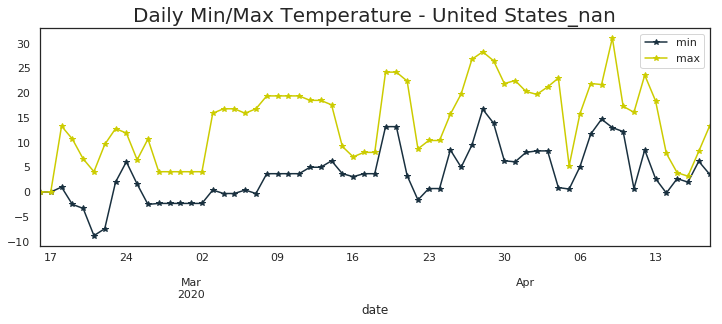

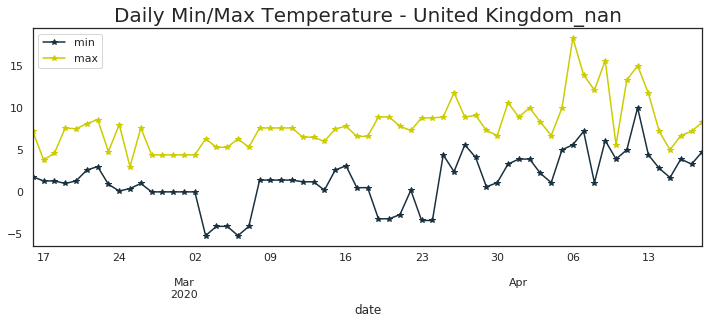

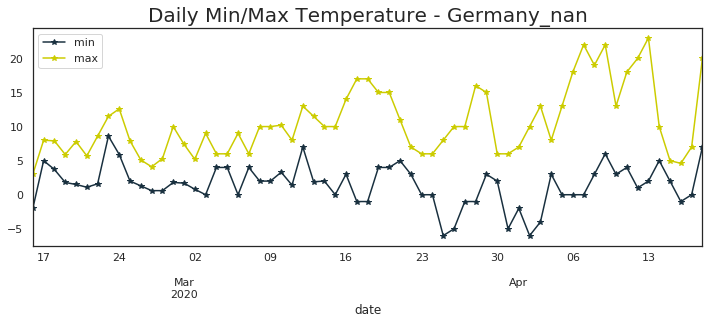

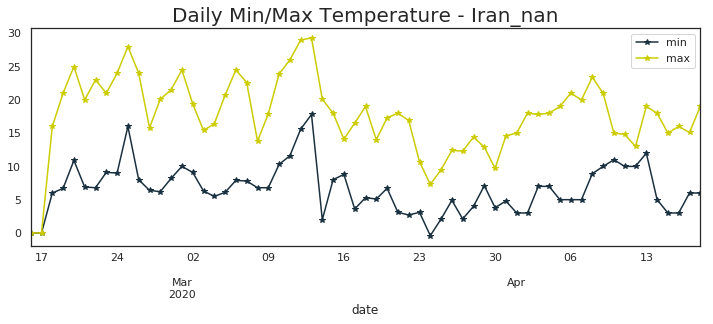

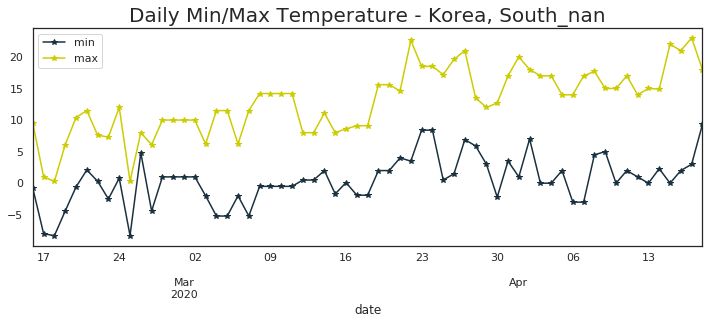

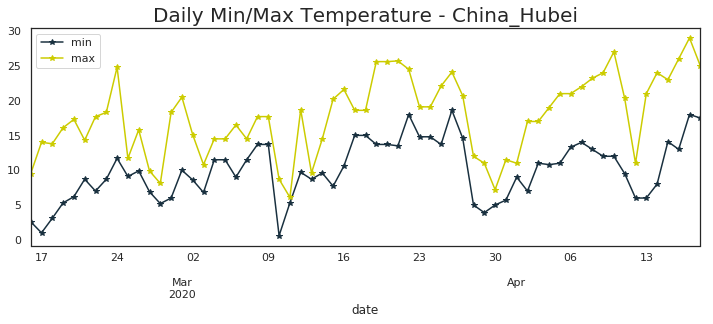

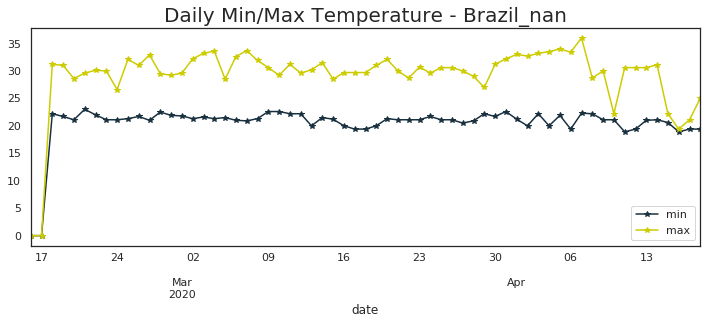

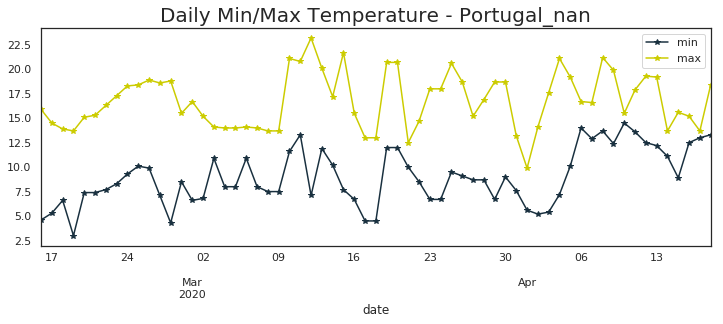

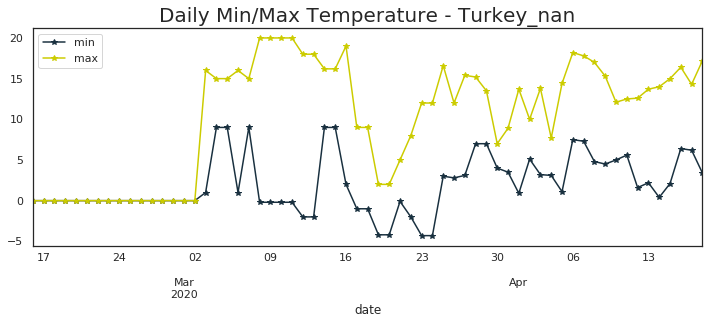

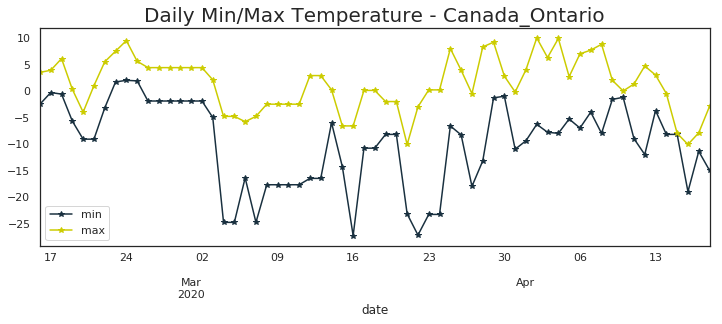

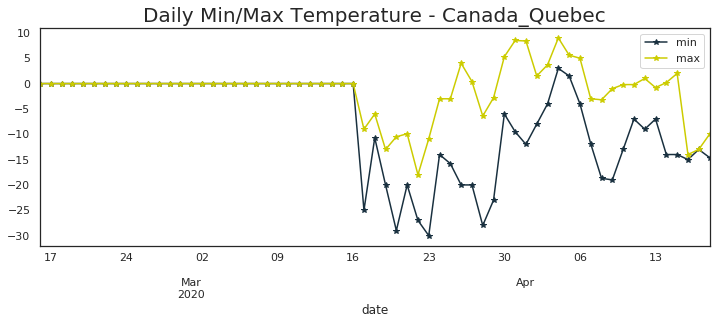

In [55]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')
#
#rg1='China_Hubei'
#p=p[p['region']==rg1]
#p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+rg1,fontdict={'fontsize': 20})
#
## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
region_s=['Italy_nan','Spain_nan','United States_nan','United Kingdom_nan','Germany_nan','Iran_nan',
          'Korea, South_nan','China_Hubei','Brazil_nan','Portugal_nan','Turkey_nan',
          'Canada_Ontario','Canada_Quebec']
p=train[['date','region','min','max']].set_index('date')
for i in range(0,len(region_s)):     
    pv=p[p['region']==region_s[i]]
    pv.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+region_s[i],fontdict={'fontsize': 20})
#

In [56]:
avg_temp=train[['region','confirmed','min','max']]  # from 20-02-20 to 06-04-2020
avg_temp=avg_temp.groupby(by='region').max()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                             min   max
region                                
United States_nan           16.7  31.1
Spain_nan                   13.3  26.8
Italy_nan                   12.0  21.7
France_nan                  11.8  23.0
Germany_nan                  8.6  23.0
United Kingdom_nan          10.0  18.3
Iran_nan                    17.8  29.3
Turkey_nan                   9.0  20.0
China_Hubei                 18.6  29.0
Belgium_nan                 11.5  26.1
Brazil_nan                  23.0  36.0
Russia_nan                   5.0  20.0
Netherlands_nan             12.8  26.1
Switzerland_nan              9.9  19.7
Portugal_nan                14.5  23.2
Canada_Quebec                3.0   9.0
Austria_nan                  2.6  11.7
India_nan                   25.0  42.0
Ireland_nan                  0.0   0.0
Peru_nan                     0.0   0.0
Sweden_nan                   6.1  12.8
Israel_nan                  12.9  24.7
Korea, South_nan            

### Kalman X Days Ahead Prediction

In [57]:
%%R

#install.packages('reshape')

NULL


In [58]:
%%R

require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL

### JOAO - FIX
#
### Flexy Days maximum forward prediction =A Hint!= "Error increases as number of days increases"
days_prediction<-max_days_prediction # Set i days prediction    ### e.g. max_days_prediction=31 days forward prediction with Kalman Filter

for (i in 1: days_prediction) { 
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

cols(
  .default = col_double(),
  date = col_date(format = "")
)




In [59]:
all_new=%R all_new

In [60]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Spain_nan')

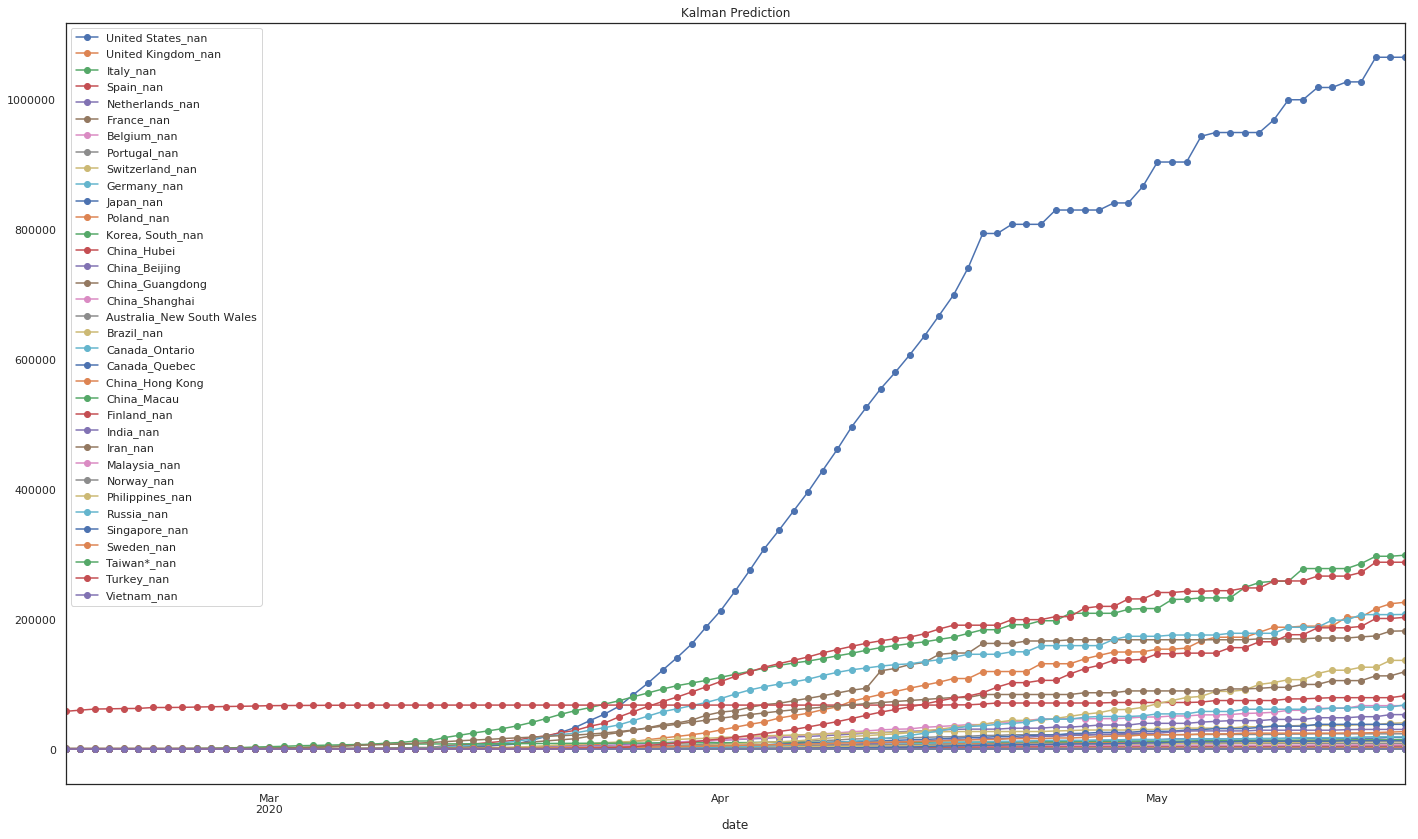

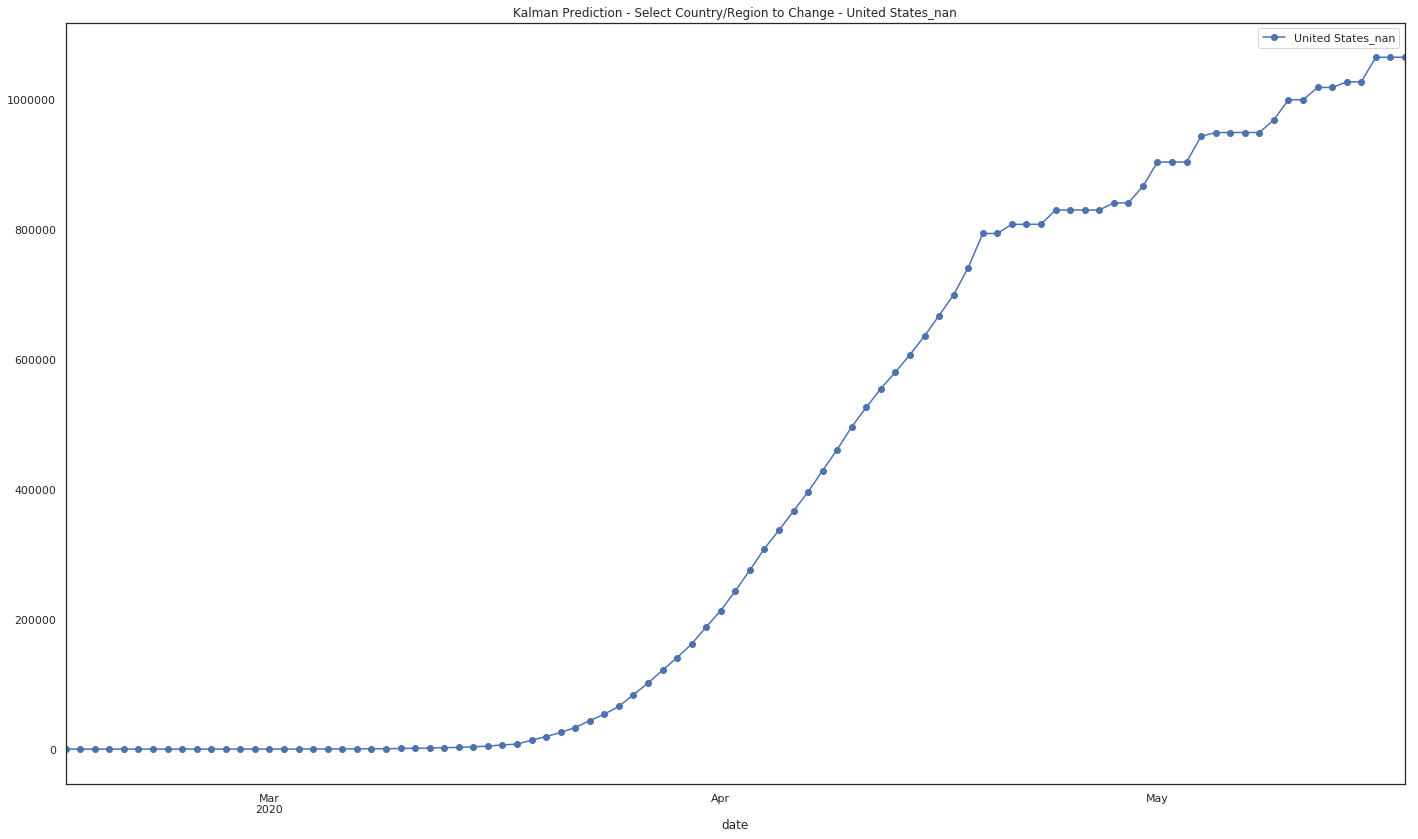

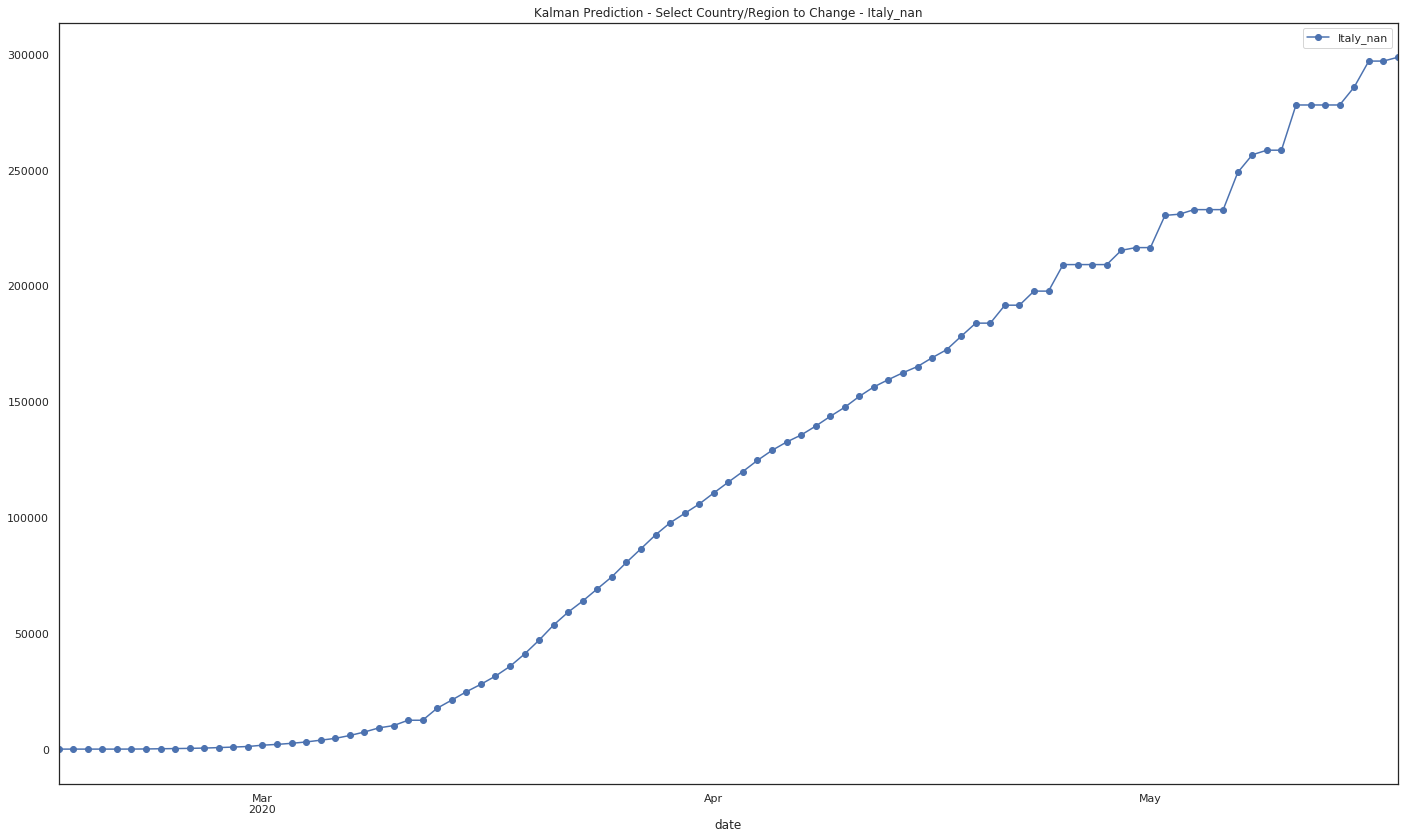

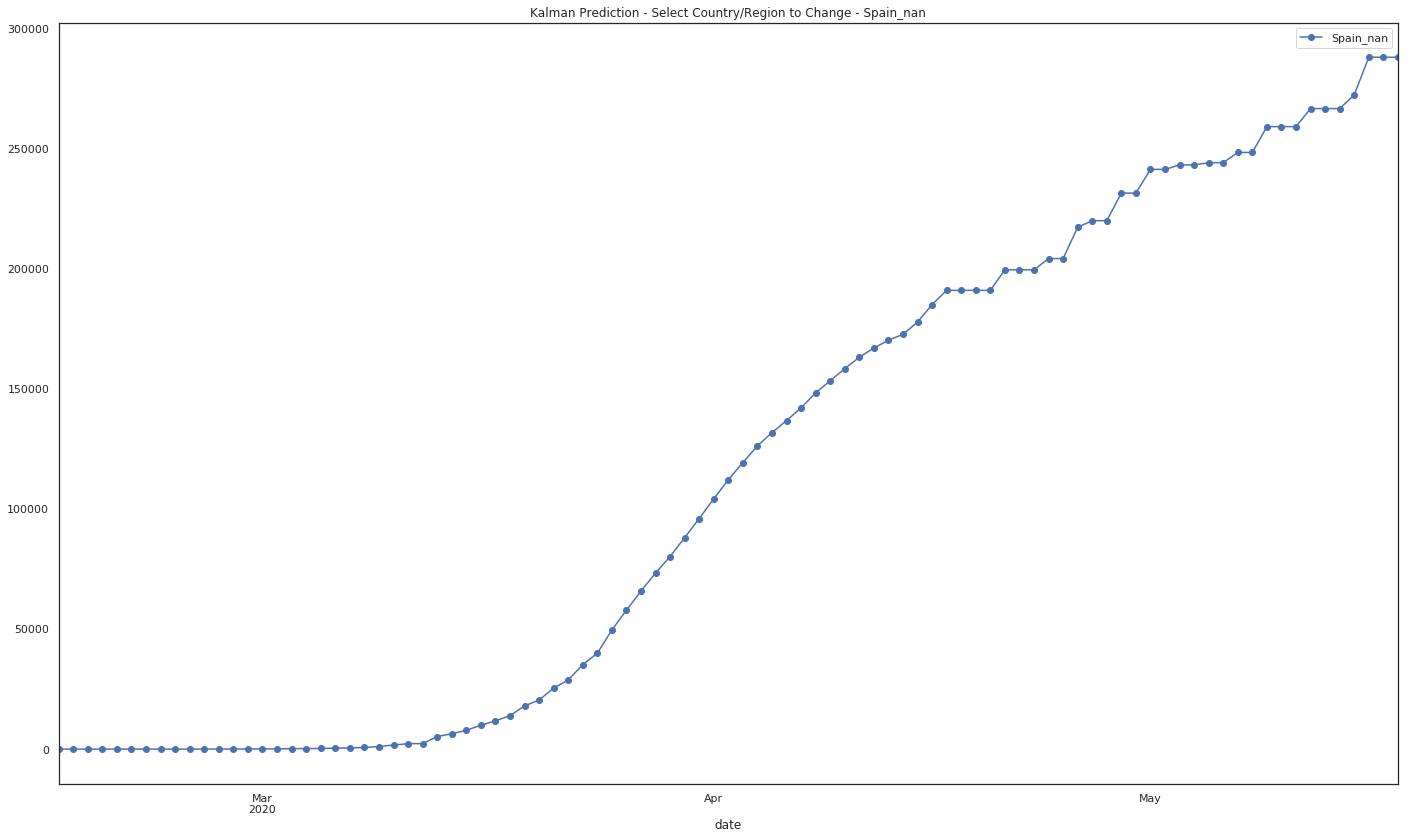

In [61]:
#
### Joao - Moving Forward ...
# Select regions From my_train_list
#
region=['date']+my_train_list
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')
#
p_kalman2=all_new[['date','United States_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))
#
p_kalman3=all_new[['date','Italy_nan']] ## Joao
p_kalman3=p_kalman3.set_index(['date'])
p_kalman3.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman3.columns[0]))
#
p_kalman4=all_new[['date','Spain_nan']] ## Joao
p_kalman4=p_kalman4.set_index(['date'])
p_kalman4.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman4.columns[0]))
#

/home/notebookuser/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


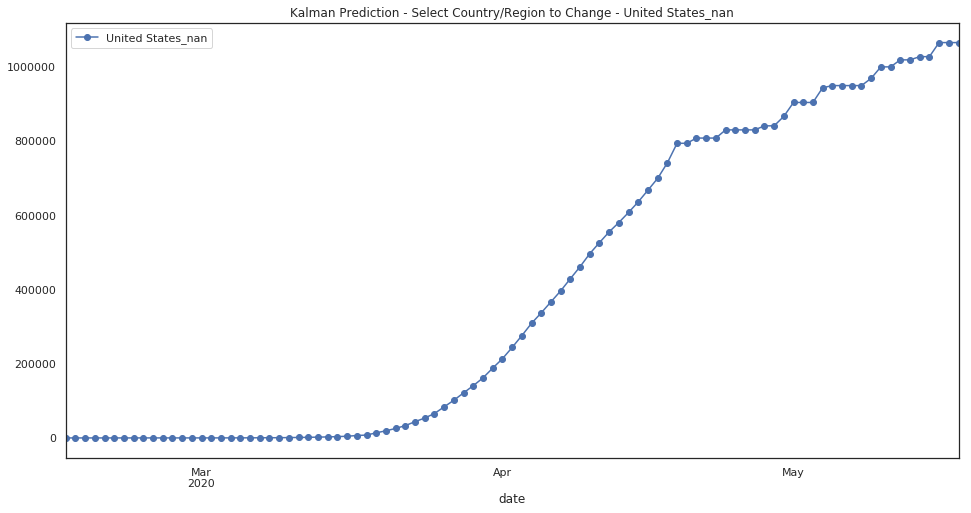

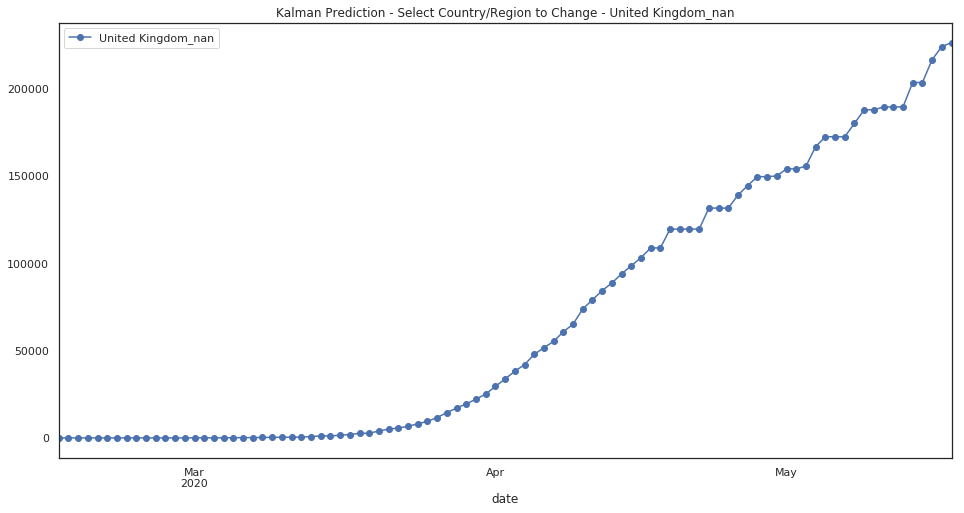

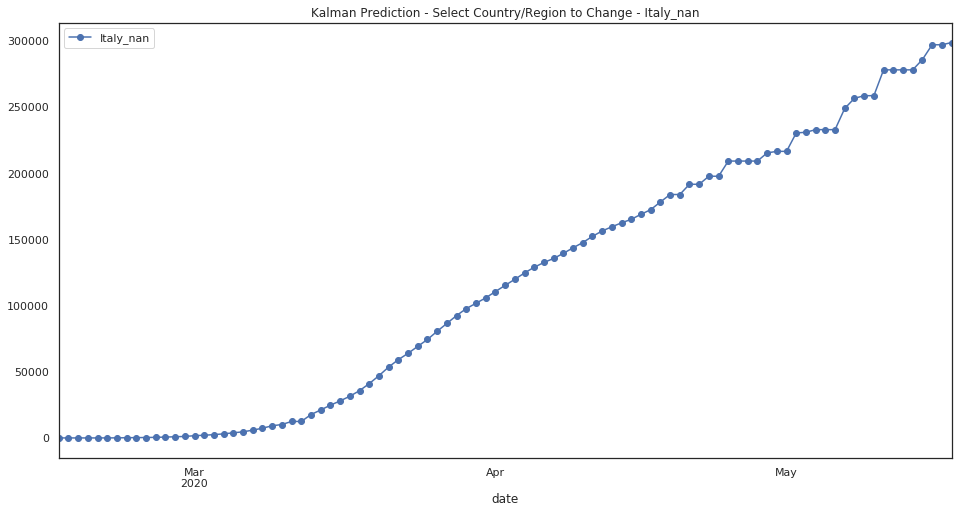

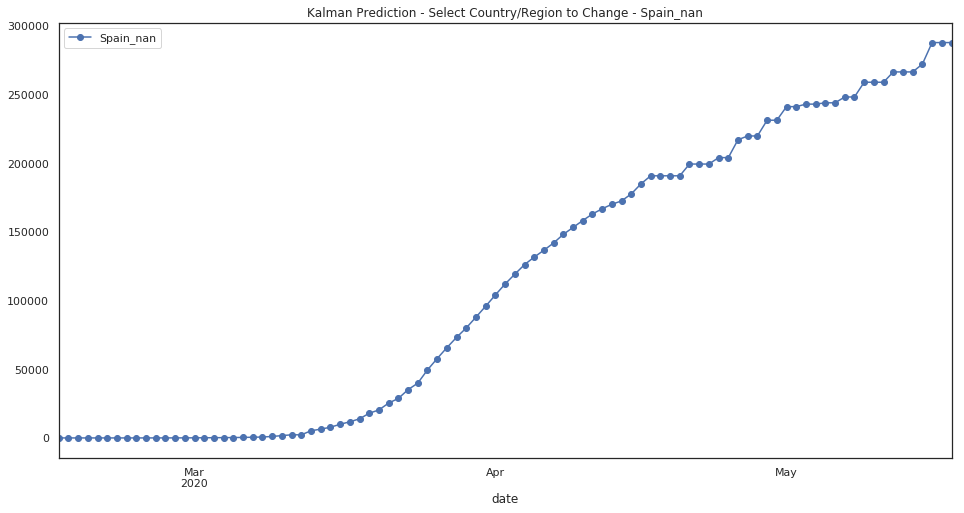

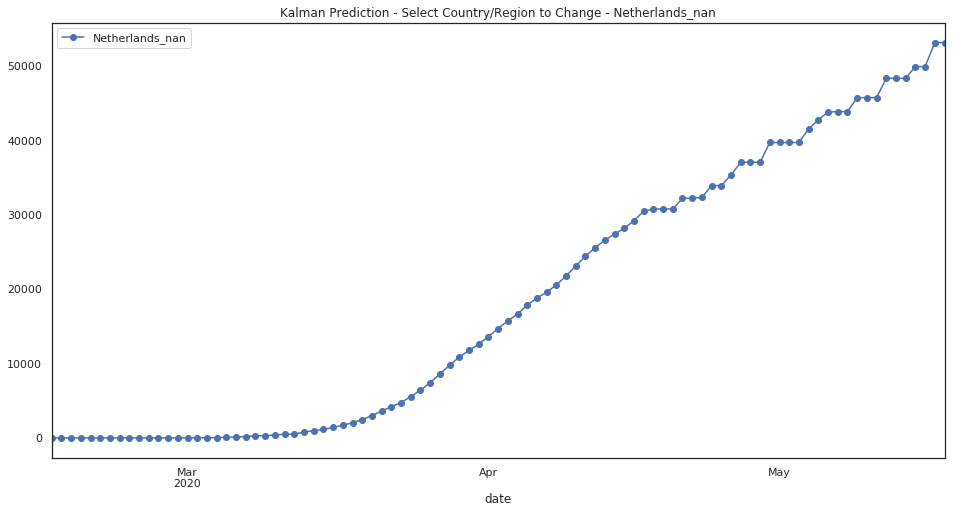

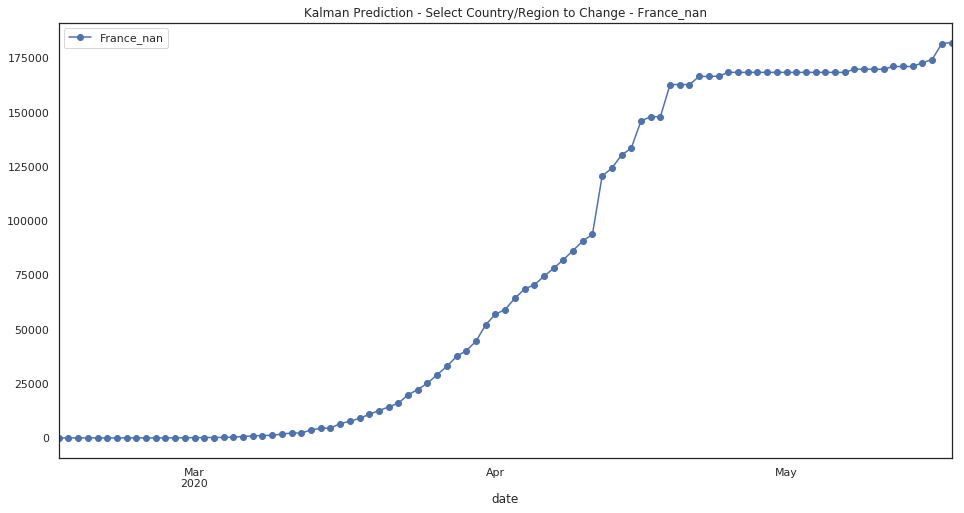

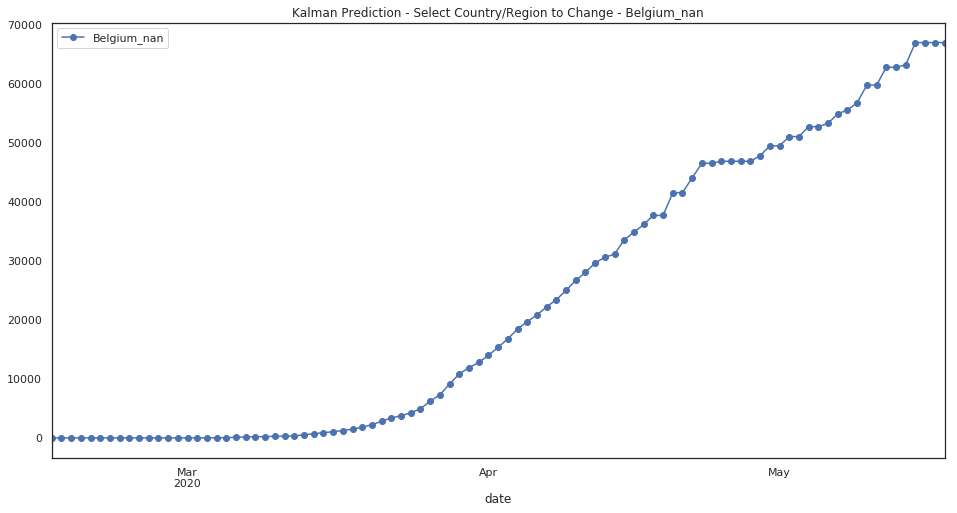

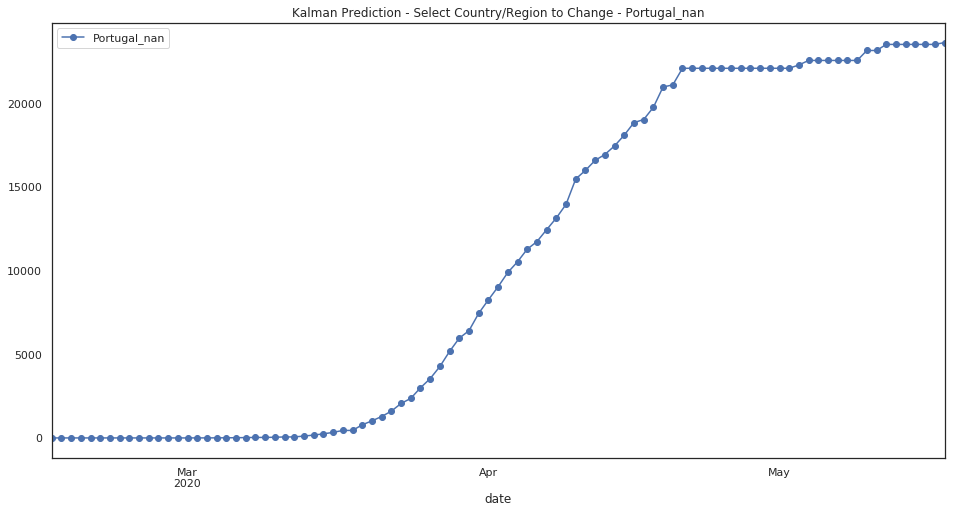

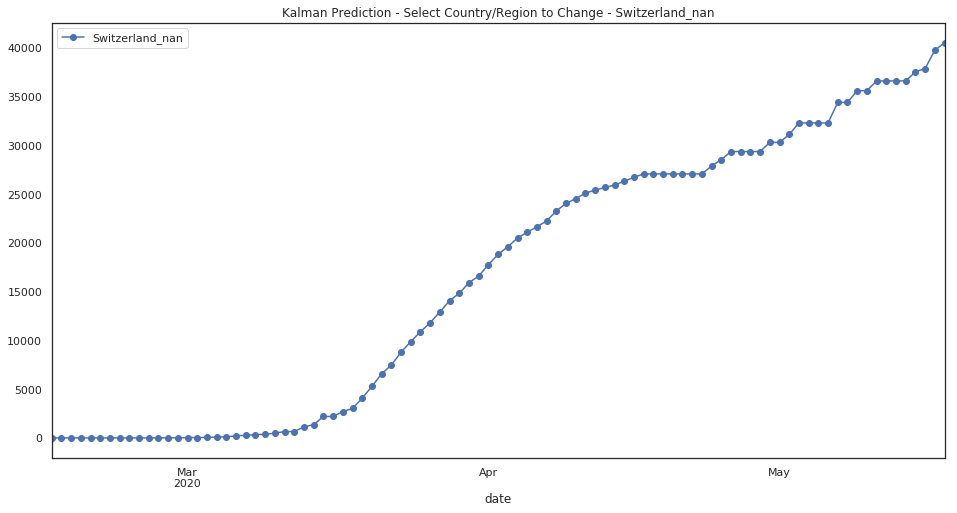

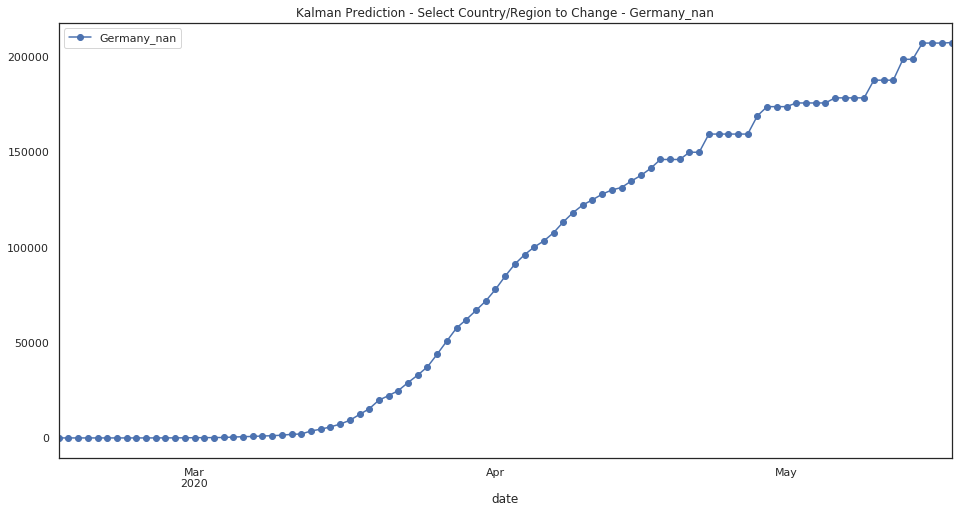

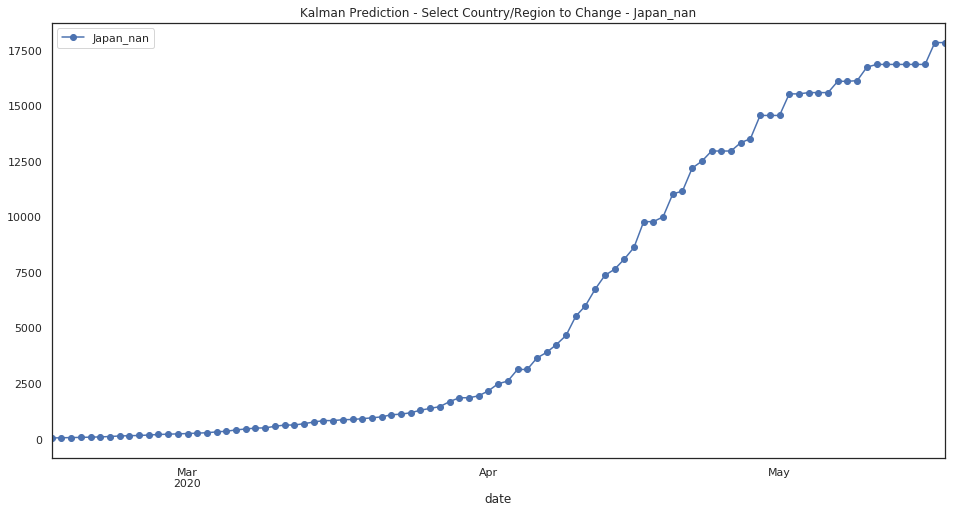

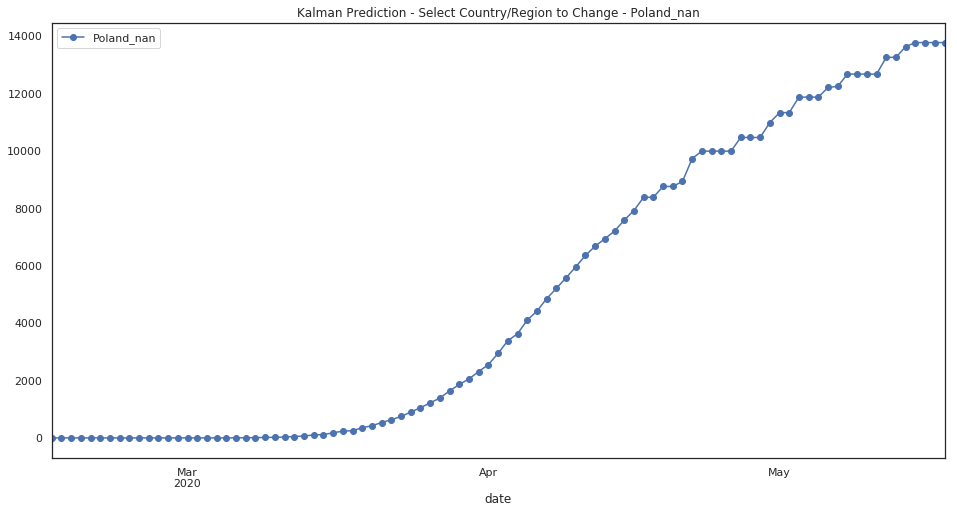

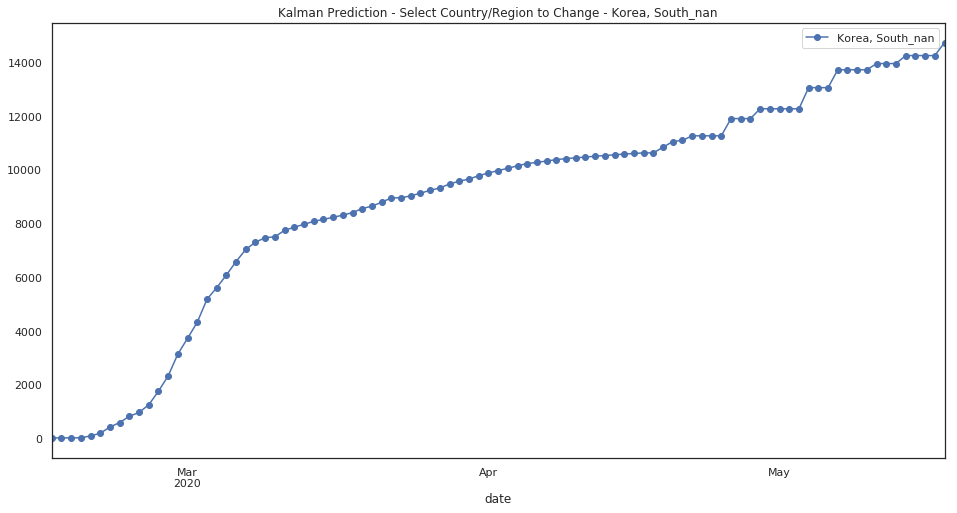

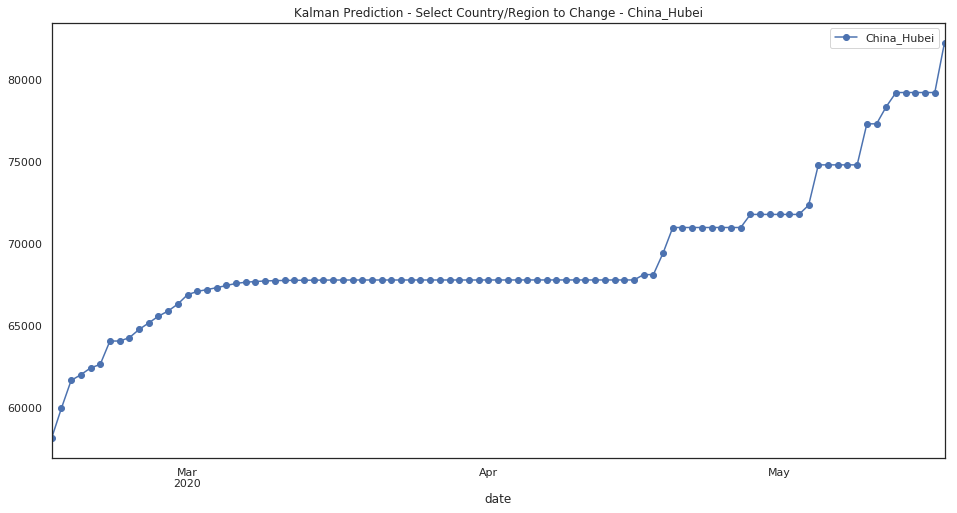

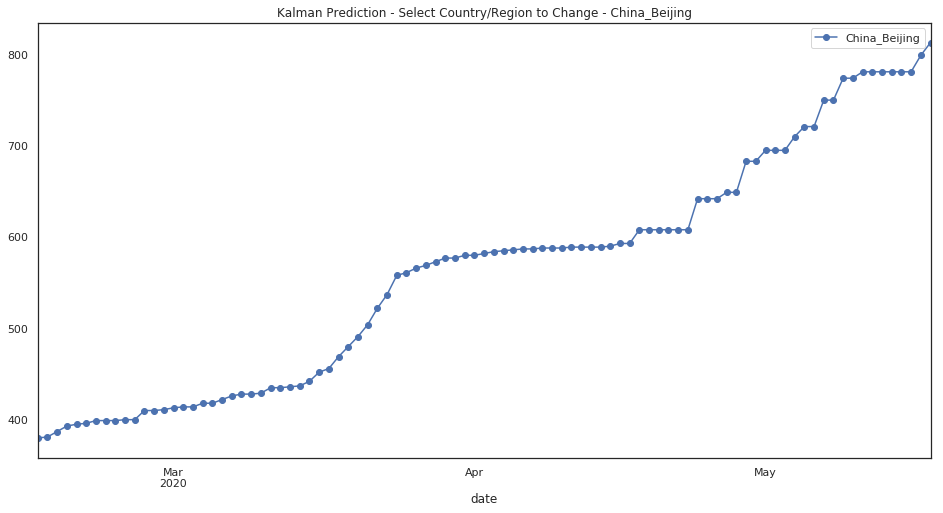

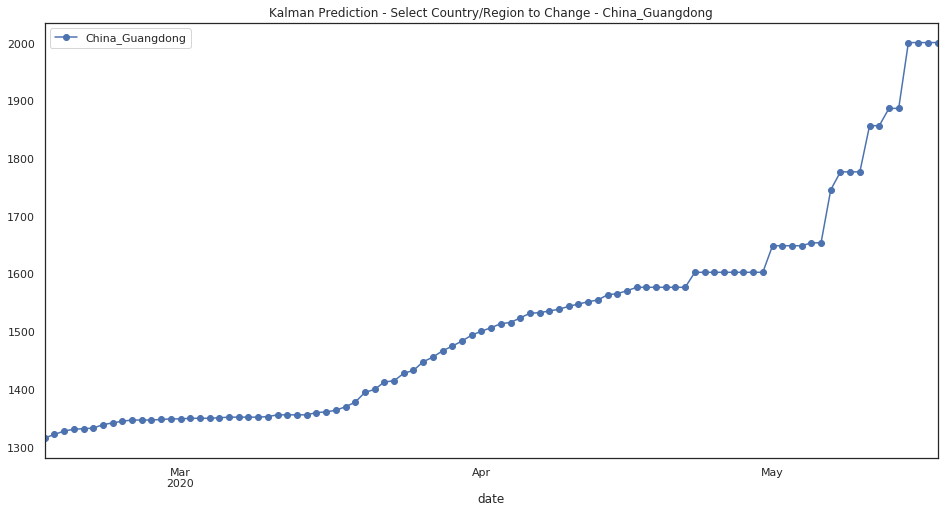

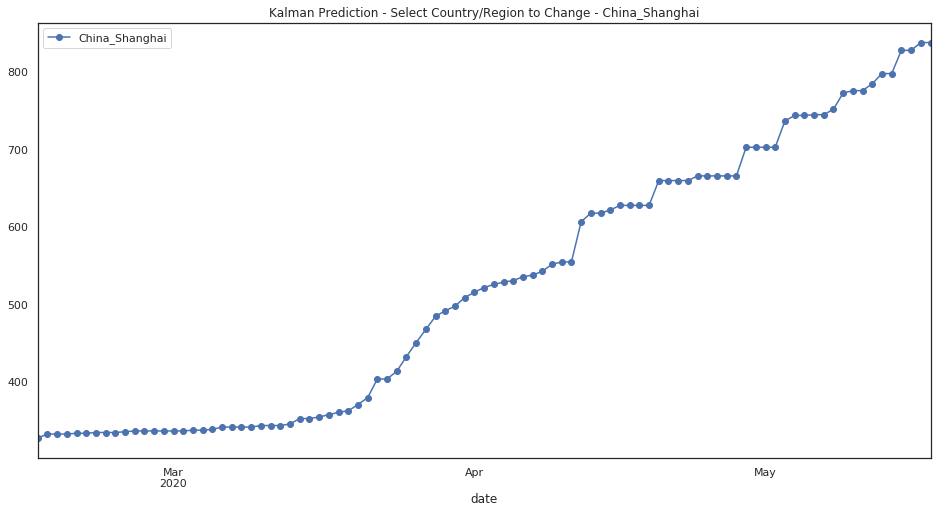

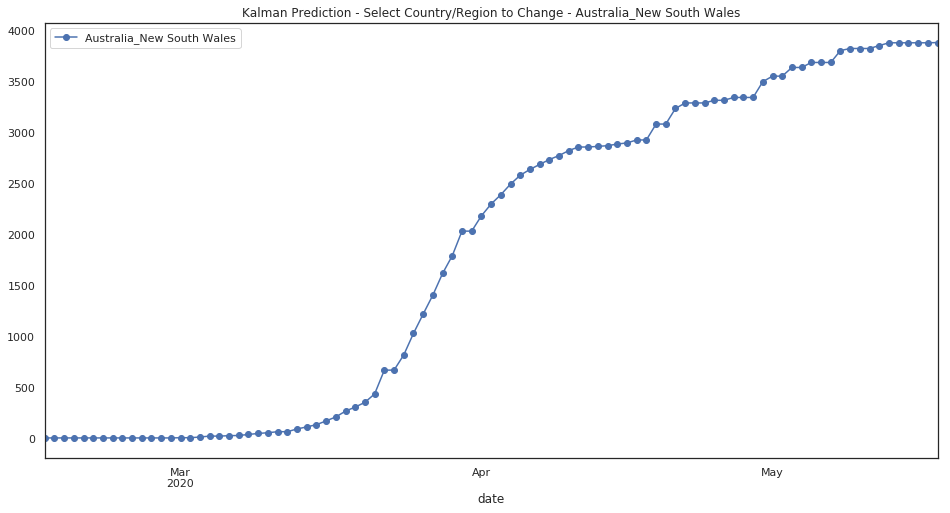

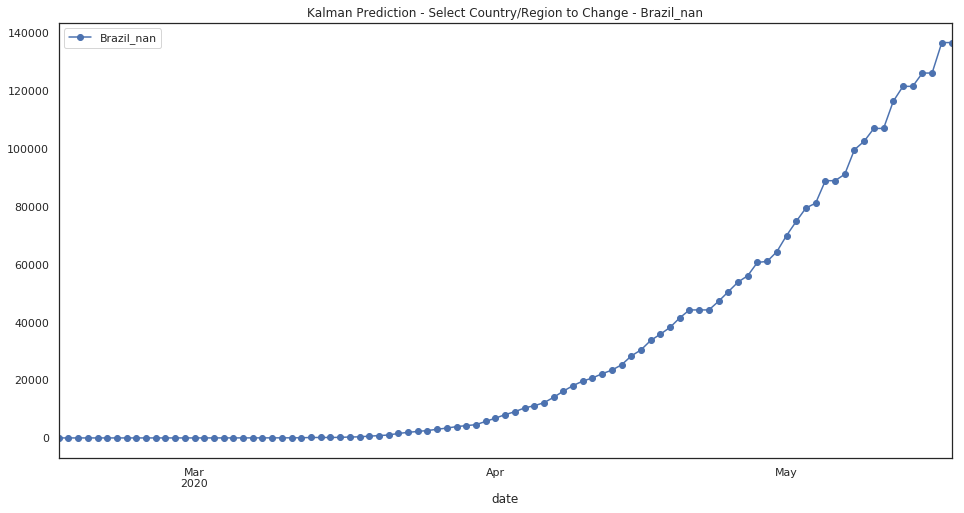

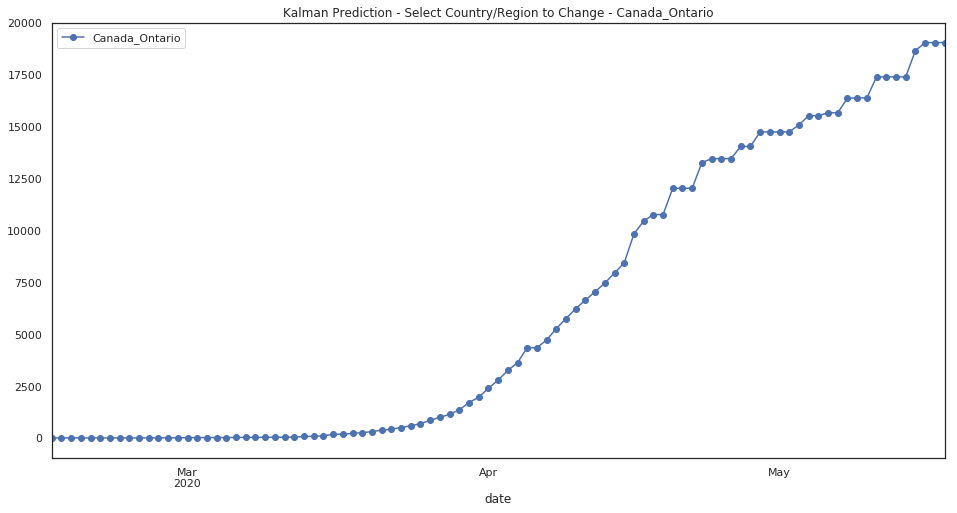

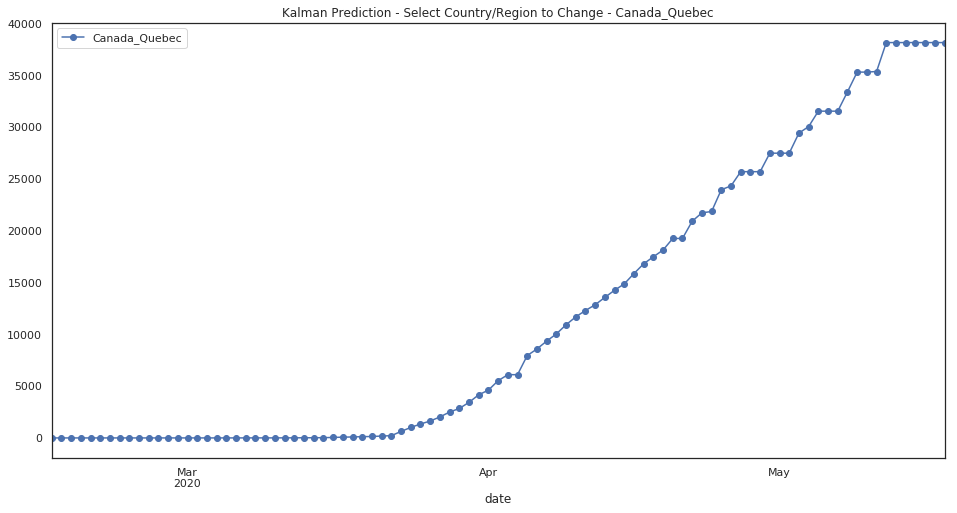

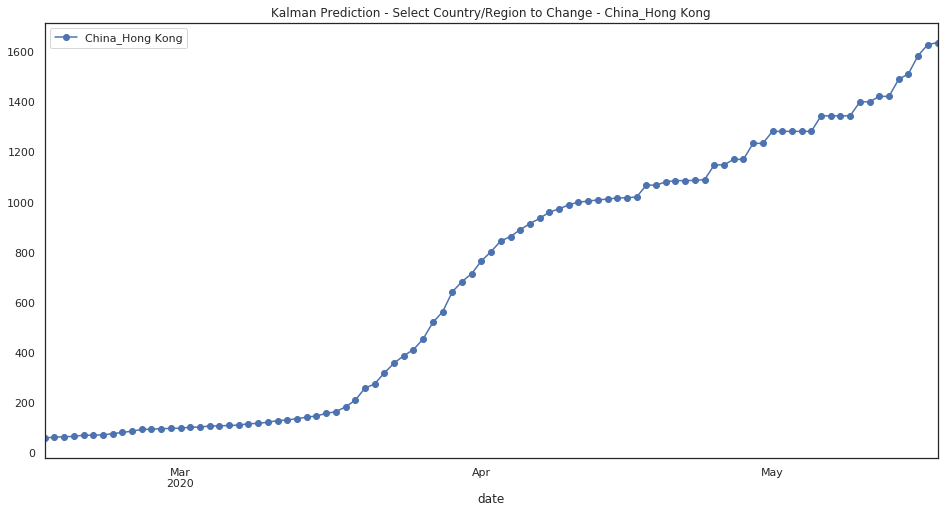

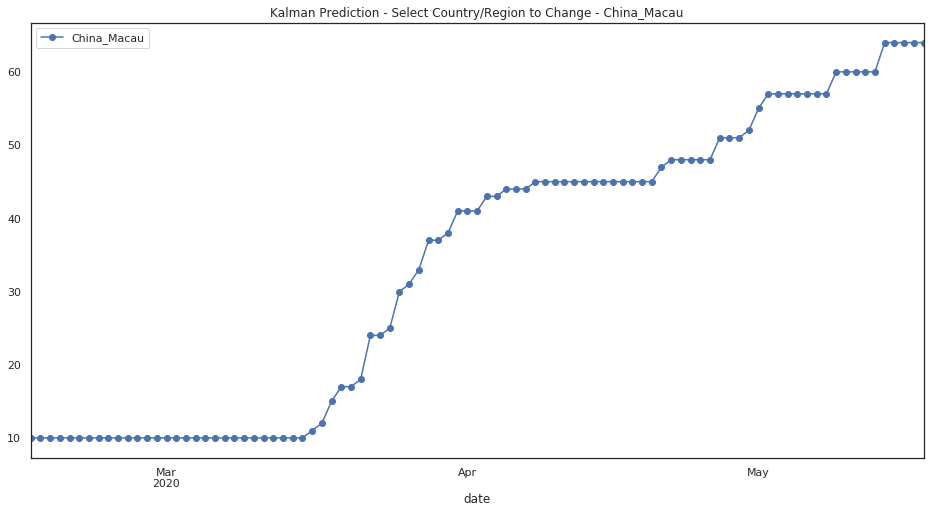

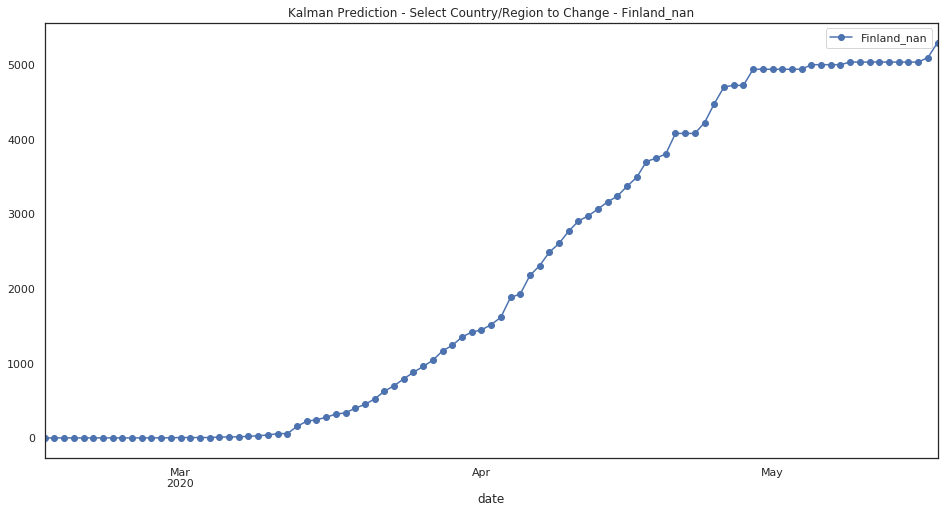

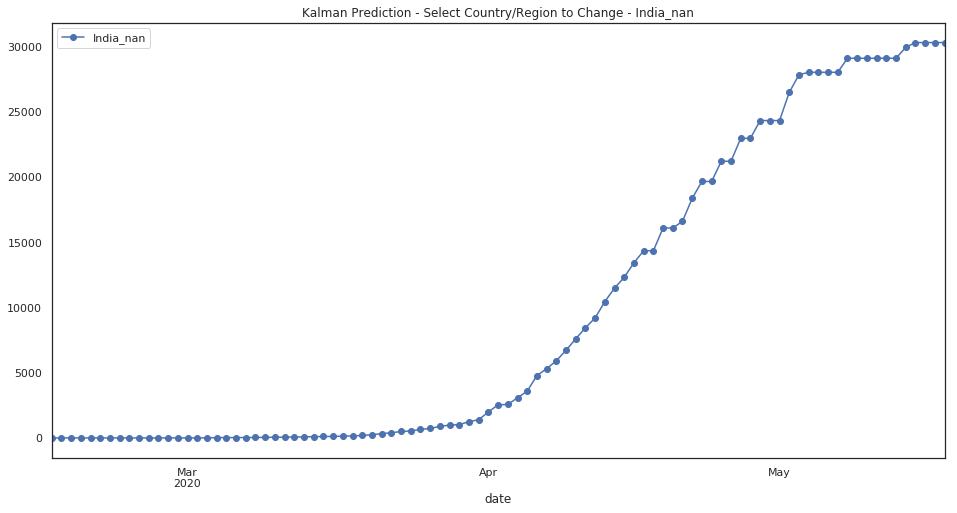

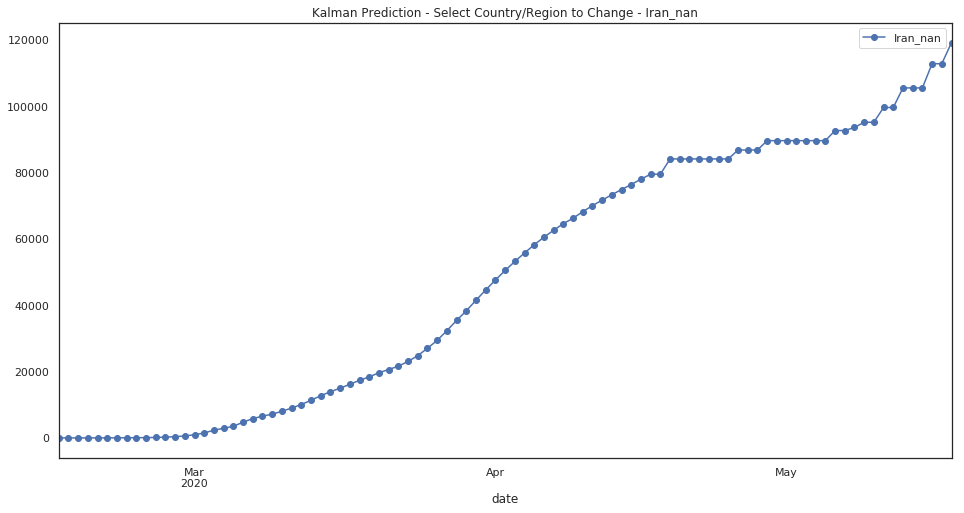

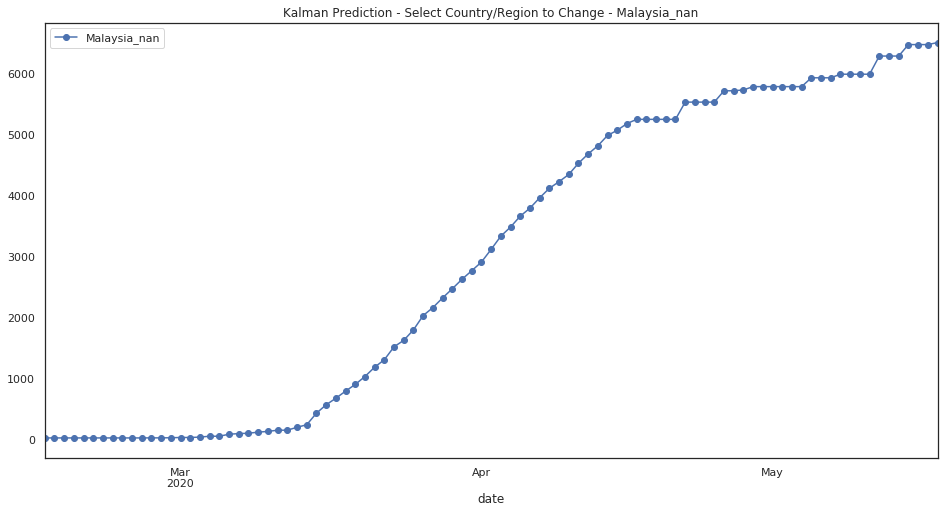

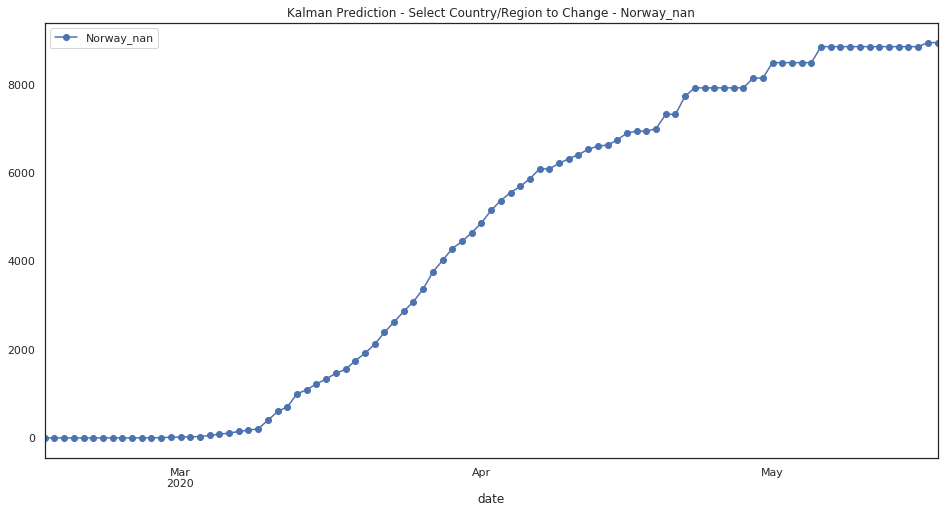

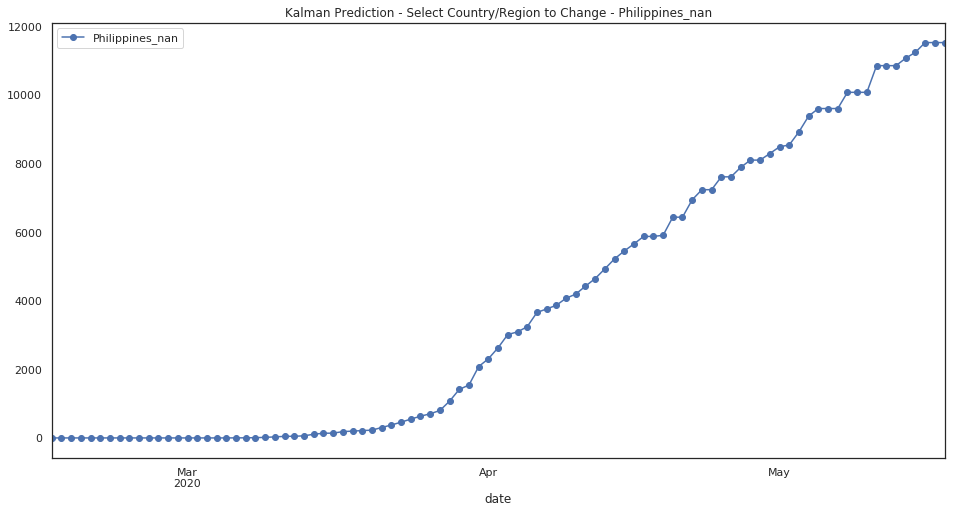

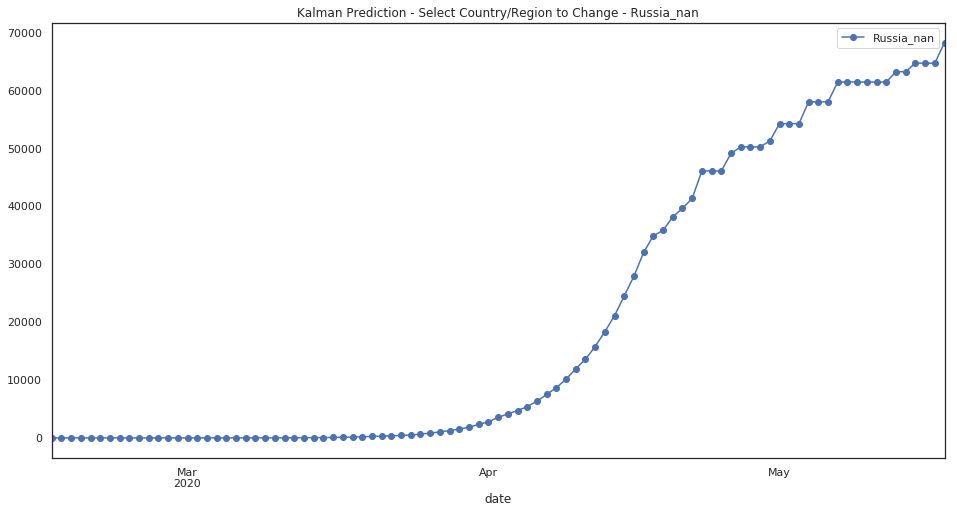

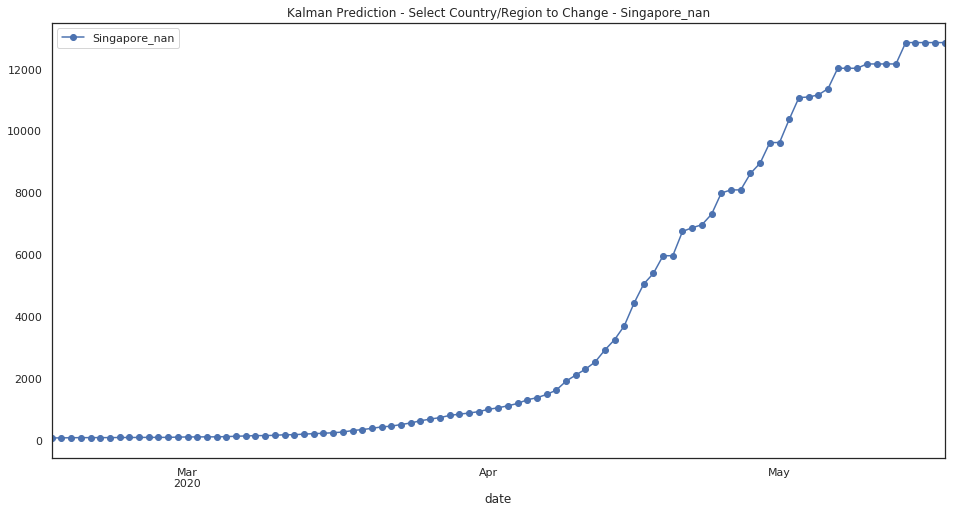

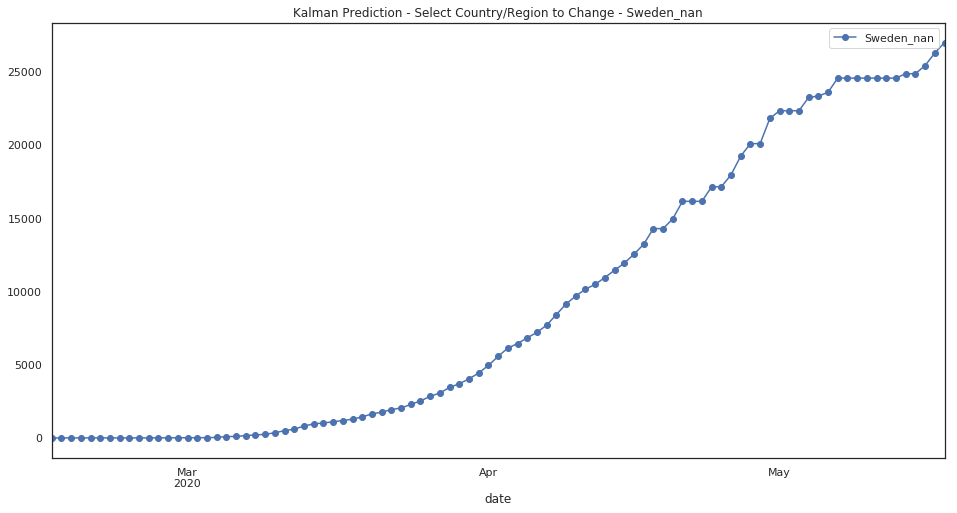

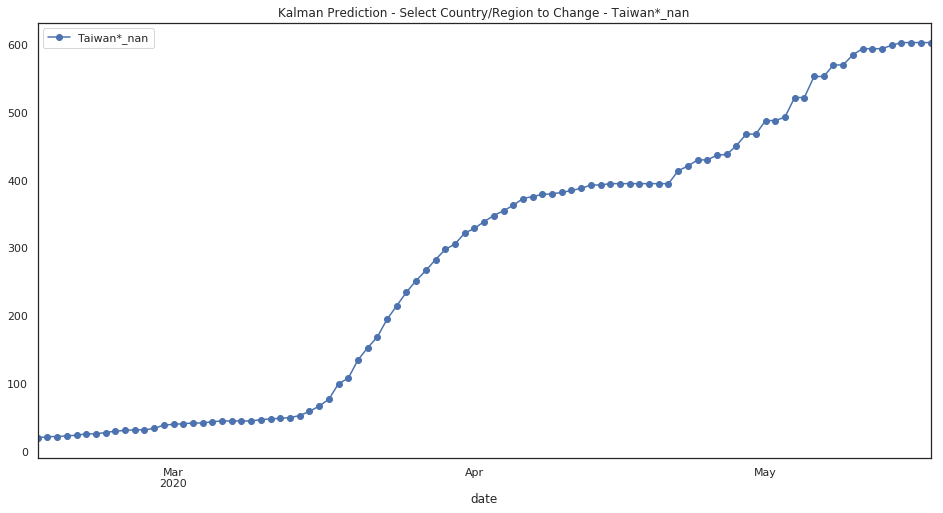

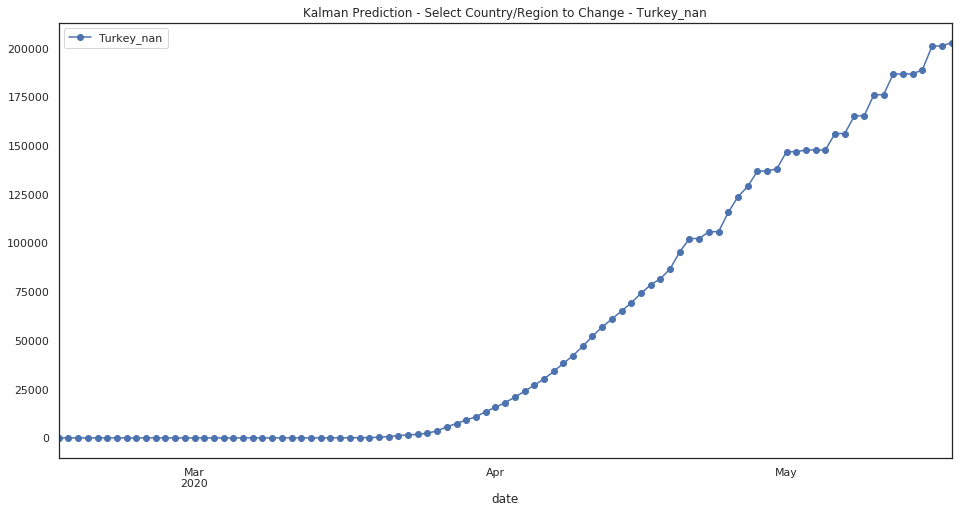

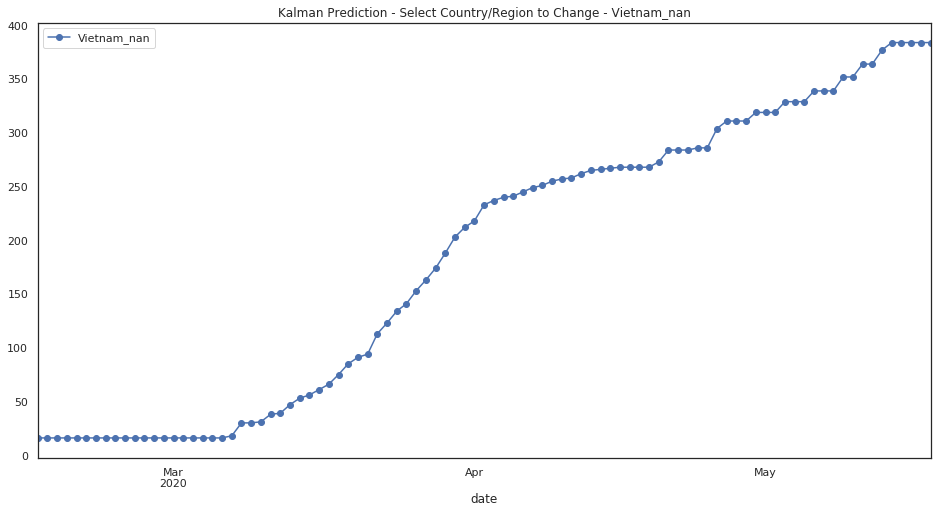

In [62]:
### Joao - Dynamic plot all regions individually
#print(region[:])
for i in range(1,len(region)):
    country_print=region[i]
    #print("here:"+country_print)
    p_kalman_rg=all_new[['date',country_print]]
    p_kalman_rg=p_kalman_rg.set_index(['date'])
    p_kalman_rg.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman_rg.columns[0]))
    

In [63]:
max_p0=all_new[:]
max_p0=max_p0.max()
max_date=max_p0[:1]
max_p0=max_p0[1:]
max_p0=pd.DataFrame(max_p0)
max_p0=max_p0.astype(str)
max_p0['pred_confirmed']=max_p0[max_p0.columns[0]].str.split(' ').str[-1].astype(float)
max_p0[max_p0.columns[0]]=max_p0[max_p0.columns[0]][:-len(max_p0['pred_confirmed'])]
max_p0=max_p0.sort_values(by='pred_confirmed', ascending=False)
#
print("### -- Confirmed max cases per country at last prediction date -- ###")
print(max_date)
max_p0[:]

### -- Confirmed max cases per country at last prediction date -- ###
date    2020-05-18 00:00:00
dtype: object


0  pred_confirmed
United States_nan                             NaN       1065541.0
Italy_nan                                     NaN        298665.0
Spain_nan                                     NaN        287822.0
United Kingdom_nan                            NaN        226161.0
Germany_nan                                   NaN        207366.0
Turkey_nan                                    NaN        202930.0
France_nan                                    NaN        182097.0
Brazil_nan                                    NaN        136638.0
Iran_nan                                      NaN        119164.0
China_Hubei                                   NaN         82259.0
Russia_nan                                    NaN         68208.0
Belgium_nan                                   NaN         66938.0
Netherlands_nan                               NaN         53122.0
Switzerland_nan                               NaN         40547.0
Canada_Quebec                                 NaN         38139.0
India_nan                                     NaN         30307.0
Sweden_nan                                    NaN         26982.0
Austria_nan                                   NaN         24283.0
Ireland_nan                                   NaN         23848.0
Portugal_nan                                  NaN         23621.0
Peru_nan                                      NaN         22781.0
Israel_nan                                    NaN         22448.0
Chile_nan                                     NaN         19742.0
Canada_Ontario                                NaN         19060.0
Japan_nan                                     NaN         17842.0
Mexico_nan                                    NaN         16637.0
United Arab Emirates_nan                      NaN         16224.0
Korea, South_nan                              NaN         14739.0
Belarus_nan                                   NaN         14290.0
Indonesia_nan                                 NaN         13902.0
...                                           ...             ...
United Kingdom_Turks and Caicos Islands       NaN            18.0
Seychelles_nan                                NaN            18.0
Nicaragua_nan                                 NaN            18.0
Dominica_nan                                  NaN            18.0
United Kingdom_Falkland Islands (Malvinas)    NaN            16.0
Saint Vincent and the Grenadines_nan          NaN            15.0
Netherlands_Curacao                           NaN            14.0
Central African Republic_nan                  NaN            12.0
Denmark_Greenland                             NaN            11.0
Suriname_nan                                  NaN            10.0
MS Zaandam_nan                                NaN             9.0
Gambia_nan                                    NaN             9.0
Canada_Yukon                                  NaN             8.0
Holy See_nan                                  NaN             8.0
Mauritania_nan                                NaN             7.0
France_Saint Barthelemy                       NaN             6.0
Western Sahara_nan                            NaN             6.0
Canada_Northwest Territories                  NaN             5.0
Burundi_nan                                   NaN             5.0
Bhutan_nan                                    NaN             5.0
United Kingdom_British Virgin Islands         NaN             4.0
Sao Tome and Principe_nan                     NaN             4.0
South Sudan_nan                               NaN             4.0
Netherlands_Bonaire, Sint Eustatius and Saba  NaN             3.0
United Kingdom_Anguilla                       NaN             3.0
France_Saint Pierre and Miquelon              NaN             1.0
China_Tibet                                   NaN             1.0
Yemen_nan                                     NaN             1.0
Canada_Recovered                              NaN             0.0
Canada_Diamond Princes

In [64]:
t.to_csv(r'data/t_confirmed_global.csv', index = False, header=True)

In [65]:
all_new.to_csv(r'data/prediction_kalman_filter_global.csv', index = False, header=True)

## Iterative Regression

In [80]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
    if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
        t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

### Joao - Fix - RuntimeWarning: divide by zero encountered in double_scalars
#
t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
    if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
        t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
        t_iter.iloc[i,6]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-2,2]*100 -1 +1))*100
        t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
    if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
        t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
        t_iter.iloc[i,7]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-4,2]*100 -1 +1))*100
    if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
        t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
        t_iter.iloc[i,8]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-8,2]*100 -1 +1))*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(10000000) # Fill 10M population if null
test_iter['population']=test_iter['population'].astype('int32')
## Joao - Fix Divid By Zero
#test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
test_iter['infected_rate'] =((test_iter['last_day']+1)*10000)/((test_iter['population']+1)*100)*100
#
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
    if(np.isnan(test_iter.iloc[i,13])):
        if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
            test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
            test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)

#


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


In [81]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [82]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
        if(pred.iloc[i,0]<pred.iloc[i-1,1]):
            pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
### Joao - Save long term predictions
pred.to_csv('data/pred_'+str(num_days_R_prediction)+'_days.csv', index = False, header=True)
###
pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

In [83]:
pred[:-1]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-02-16            188.0       2326.0        162.0      86689.0   
2020-02-17            188.0       2326.0        162.0      86689.0   
2020-02-18            282.0       2326.0        241.0      86689.0   
2020-02-19            225.0       2326.0        247.0      86689.0   
2020-02-20            267.0       2326.0        241.0      86689.0   
2020-02-21            288.0       2326.0        254.0      86689.0   
2020-02-22            261.0       2326.0        248.0      86689.0   
2020-02-23            255.0       2326.0        235.0      86689.0   
2020-02-24            266.0       2326.0        271.0      86689.0   
2020-02-25            463.0       2326.0        234.0      86689.0   
2020-02-26            369.0       2326.0        410.0      86689.0   
2020-02-27            429.0       2326.0        401.0      86689.0   
2020-02-28            404.0       2326.0        352.0      86689.0   
2020-02-29            408.0       2326.0        386.0      86689.0   
2020-03-01            412.0       2326.0        376.0      86689.0   
2020-03-02            417.0       2326.0        373.0      86689.0   
2020-03-03            422.0       2326.0        657.0     173379.0   
2020-03-04            409.0       2326.0       1140.0     173334.0   
2020-03-05            411.0       2326.0       2514.0     173334.0   
2020-03-06            414.0       2326.0       2353.0     173363.0   
2020-03-07            426.0       2326.0       3154.0     173363.0   
2020-03-08            426.0       2326.0       3121.0     173363.0   
2020-03-09            933.0       2325.0       3468.0     173363.0   
2020-03-10           1092.0       6977.0       3526.0     173370.0   
2020-03-11           1319.0      25374.0       3510.0     173370.0   
2020-03-12           1607.0      30195.0       3489.0     173370.0   
2020-03-13           1630.0      56091.0       4137.0     173370.0   
2020-03-14           1619.0      79156.0       4463.0     173370.0   
2020-03-15           2385.0      90802.0       6263.0     173370.0   
2020-03-16           3309.0     100075.0       8073.0     173369.0   
...                     ...          ...          ...          ...   
2020-04-19         181097.0    1256702.0     394612.0   62590265.0   
2020-04-20         181069.0    1277653.0     394594.0   64063973.0   
2020-04-21         189999.0    1277650.0     401322.0   68051747.0   
2020-04-22         189947.0    1277627.0     401284.0   68051746.0   
2020-04-23         209113.0    1384701.0     404178.0   68051745.0   
2020-04-24         212128.0    1384692.0     412827.0   68051731.0   
2020-04-25         217605.0    1384685.0     412710.0   72819712.0   
2020-04-26         223271.0    1384695.0     436771.0   72819701.0   
2020-04-27         241703.0    1384692.0     436772.0   72819695.0   
2020-04-28         243969.0    1384676.0     436694.0   72819693.0   
2020-04-29         243967.0    1468476.0     460893.0   72906384.0   
2020-04-30         247921.0    1468447.0     482282.0   72906384.0   
2020-05-01         260637.0    1538280.0     493055.0   72906384.0   
2020-05-02         266705.0    1538280.0     493088.0   72906358.0   
2020-05-03         266676.0    1573194.0     493077.0   74553468.0   
2020-05-04         276356.0    1591822.0     493004.0   77067497.0   
2020-05-05         276353.0    1591822.0     526225.0   77067495.0   
2020-05-06         278033.0    1591808.0     526084.0   77067490.0   
2020-05-07         291342.0    1619733.0     553700.0   78888001.0   
2020-05-08         291317.0    1675590.0     553717.0   78888000.0   
2020-05-09         291260.0    1675588.0     553600.0   78887978.0   
2020-05-10         312374.0    1675586.0     596521.0   83135821.0   
2020-05-11         312345.0    1675588.0     596466.0   83135809.0   
2020-05-12         314391.0    1684899.0     607205.0   83135794.0   
2020-05-13

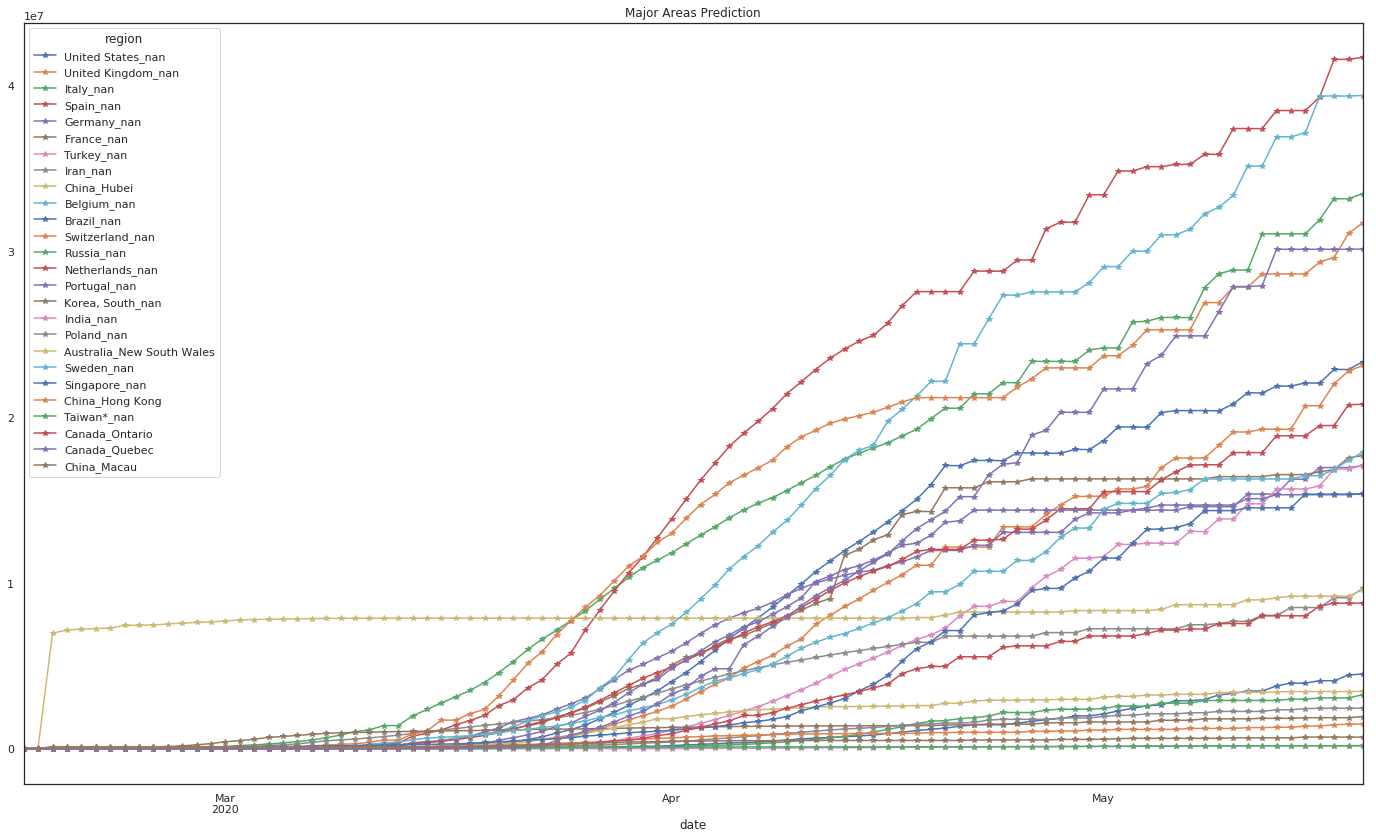

In [84]:
region=[
 ### JOAO - LIST of Countries - Start here
 ###    'Andorra_nan', 'Morocco_nan',
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',
        'Germany_nan',
        'France_nan',
        'Turkey_nan',
        'Iran_nan',
        'China_Hubei',
        'Belgium_nan',
        'Brazil_nan',
        'Switzerland_nan',
        'Russia_nan',
        'Netherlands_nan',
        'Portugal_nan',
        'Korea, South_nan',
        'India_nan',
        'Poland_nan',
        'Australia_New South Wales',
        'Sweden_nan',
        'Singapore_nan',
        'China_Hong Kong',
        'Taiwan*_nan',
        'Canada_Ontario',
        'Canada_Quebec',
        'China_Macau'
  ### JOAO - LIST of Countries - Finish here     
       ]

p=pred[region]
p.plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

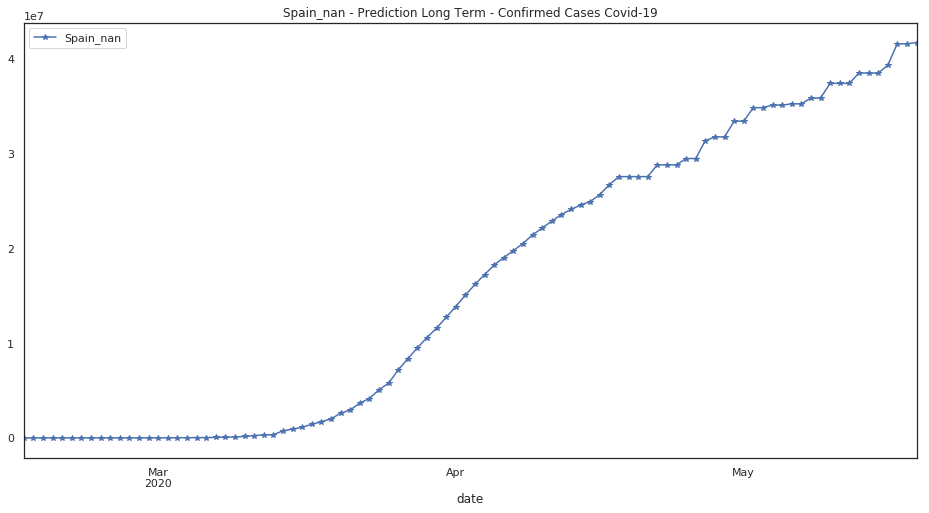

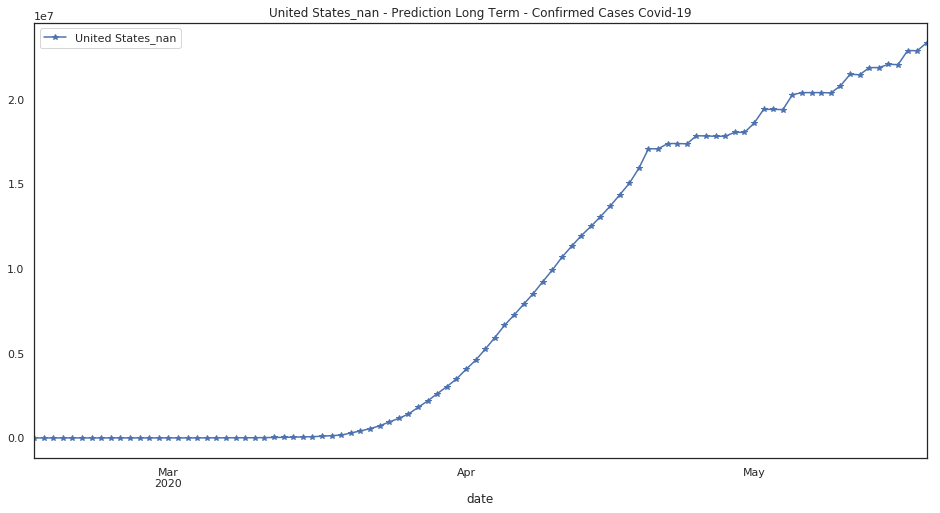

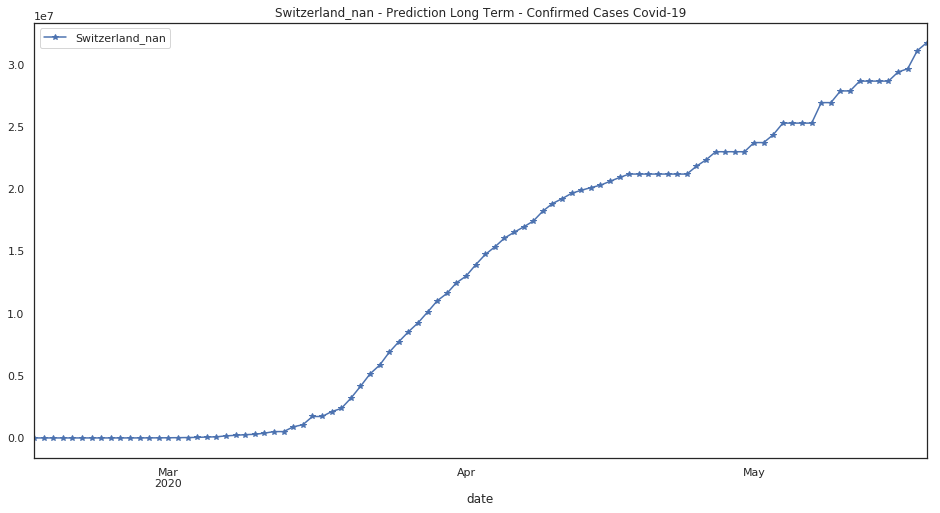

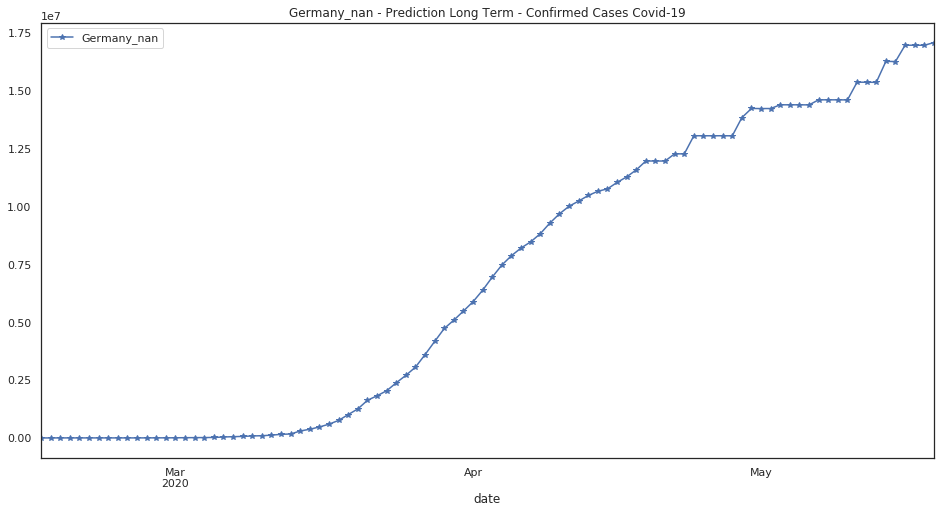

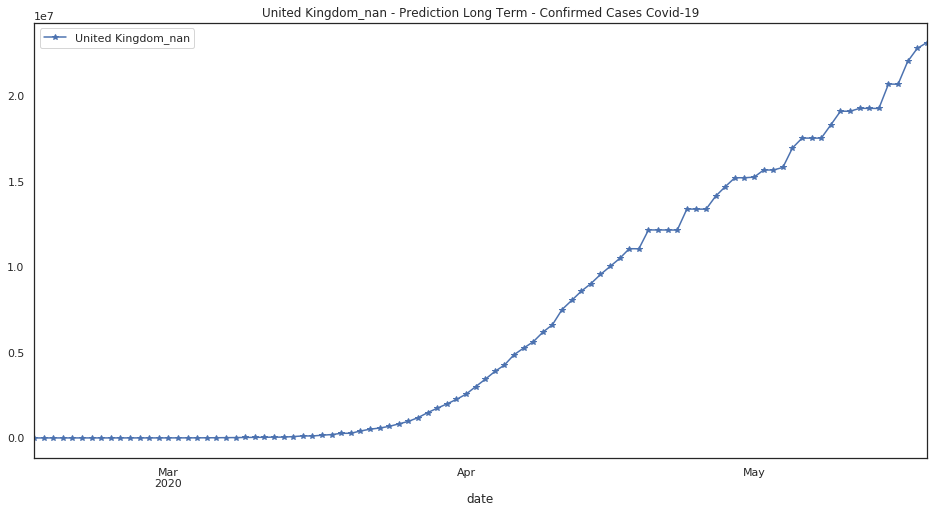

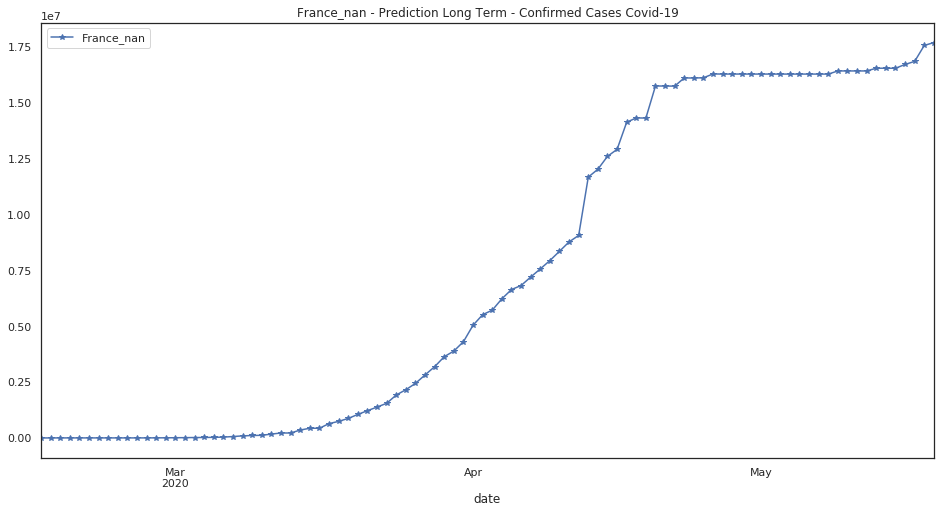

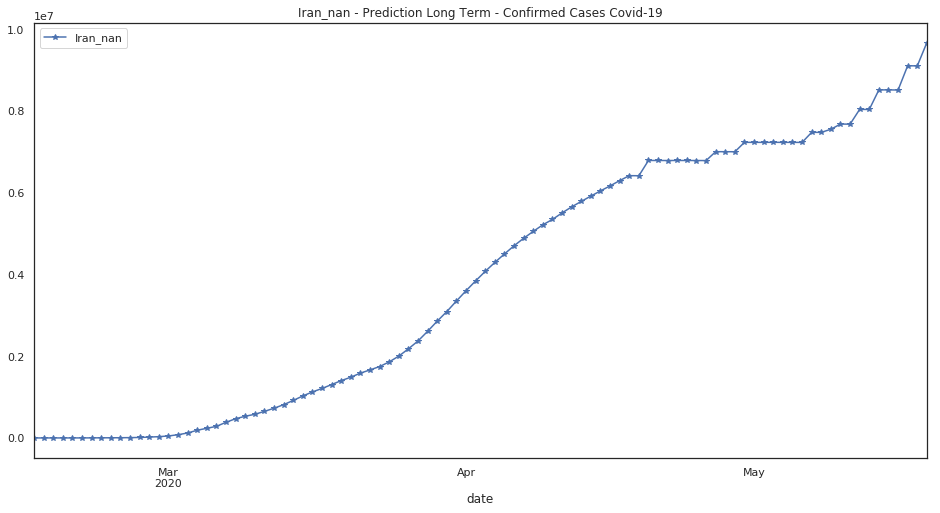

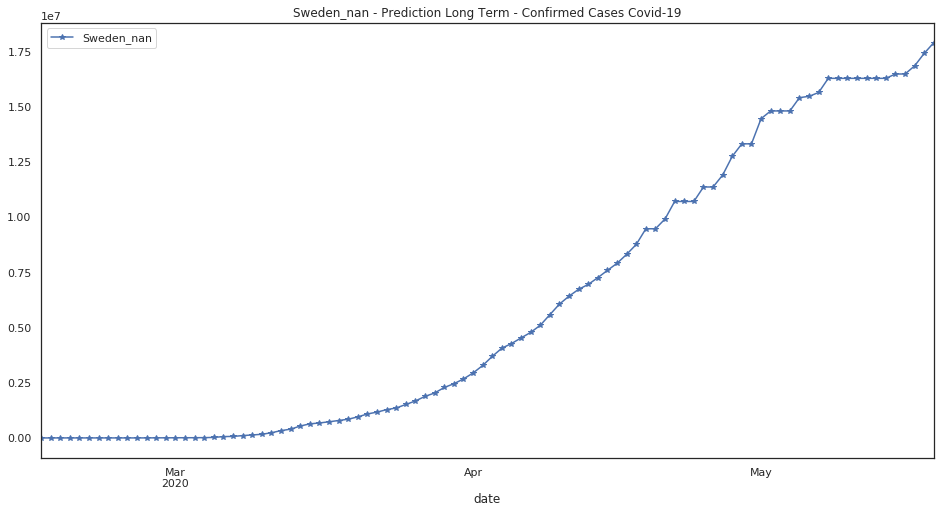

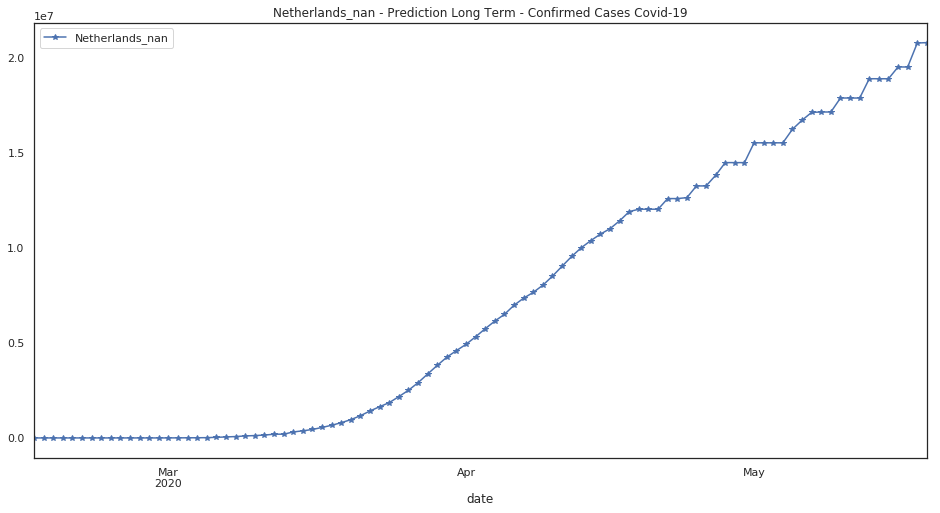

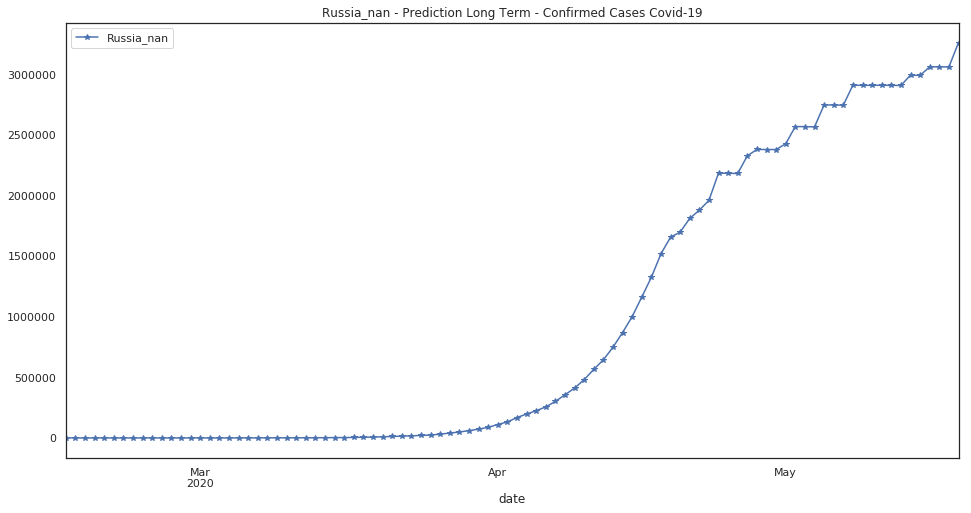

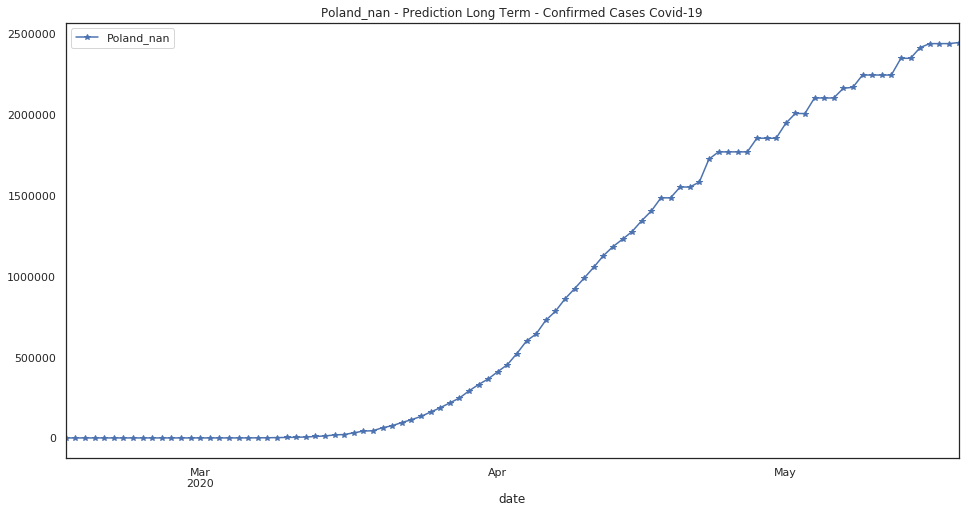

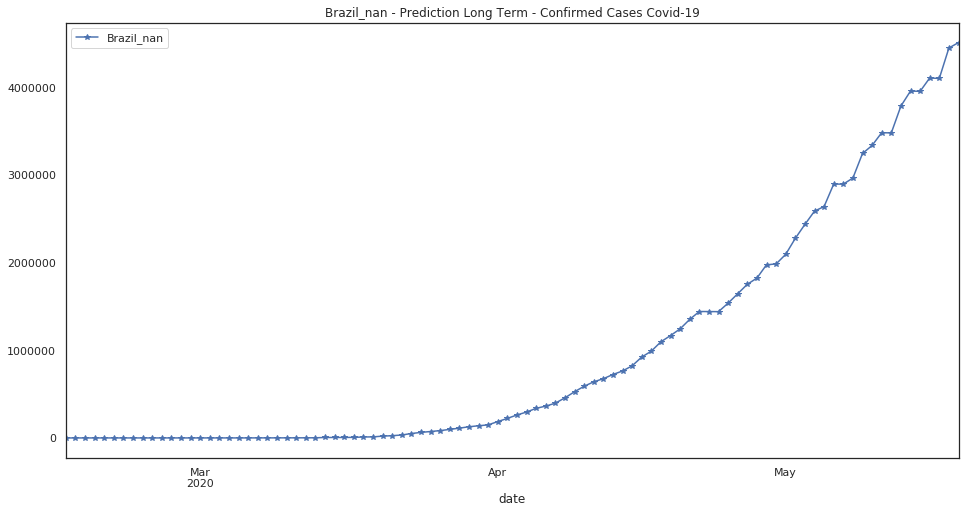

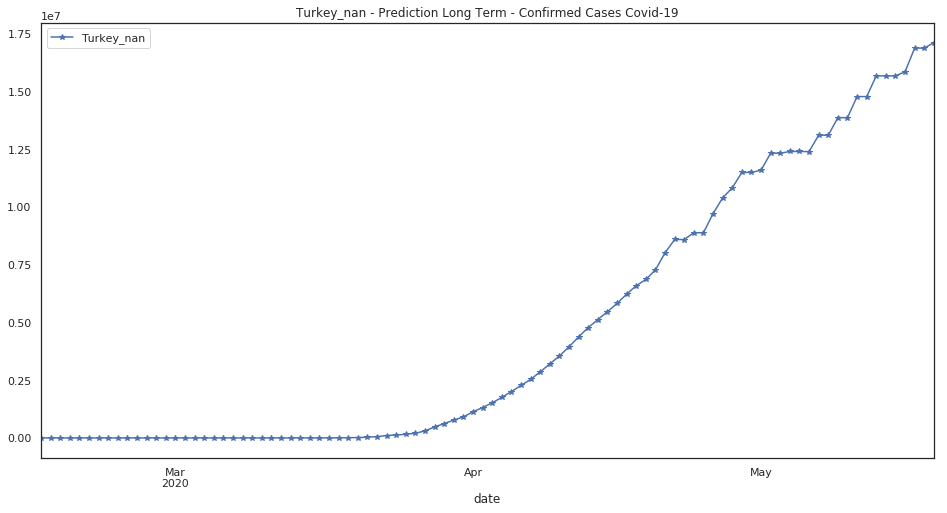

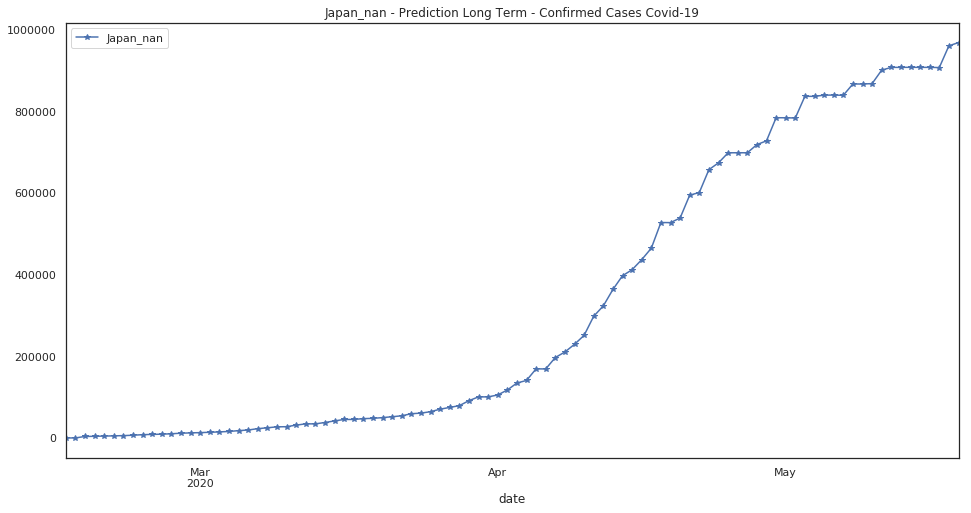

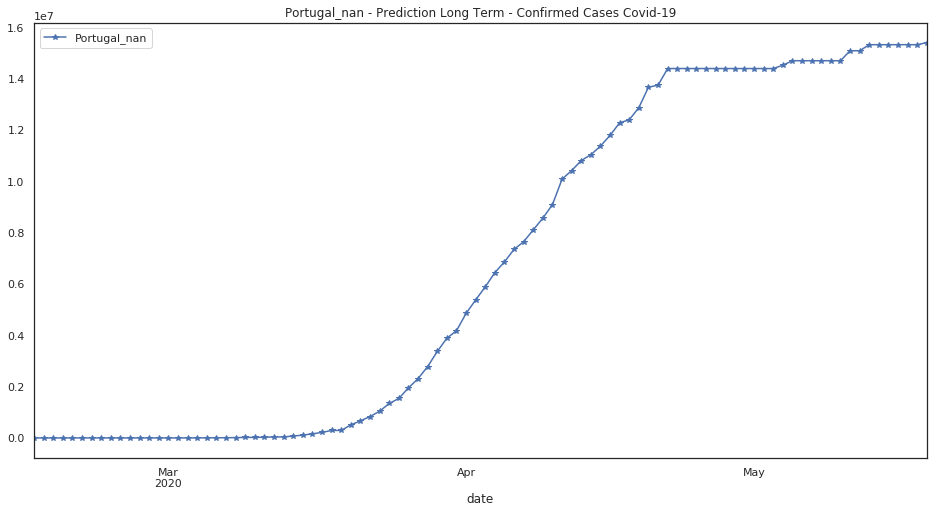

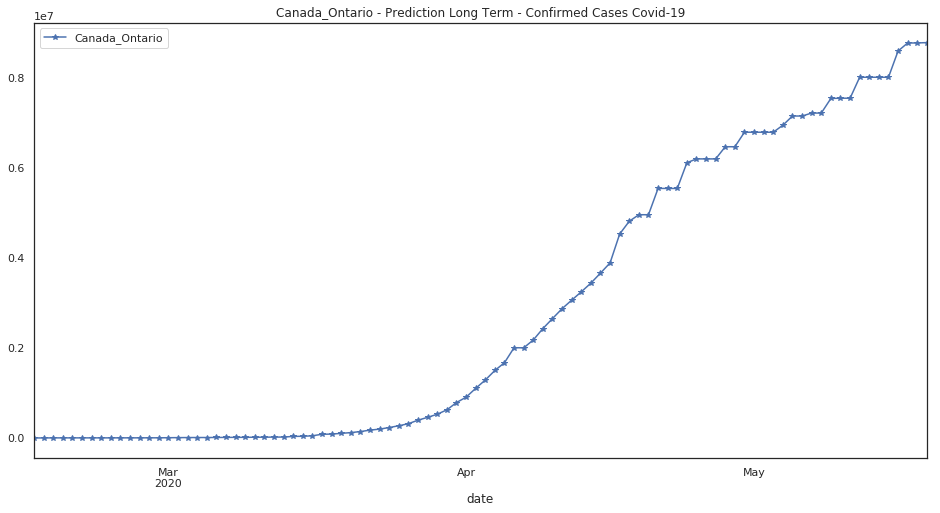

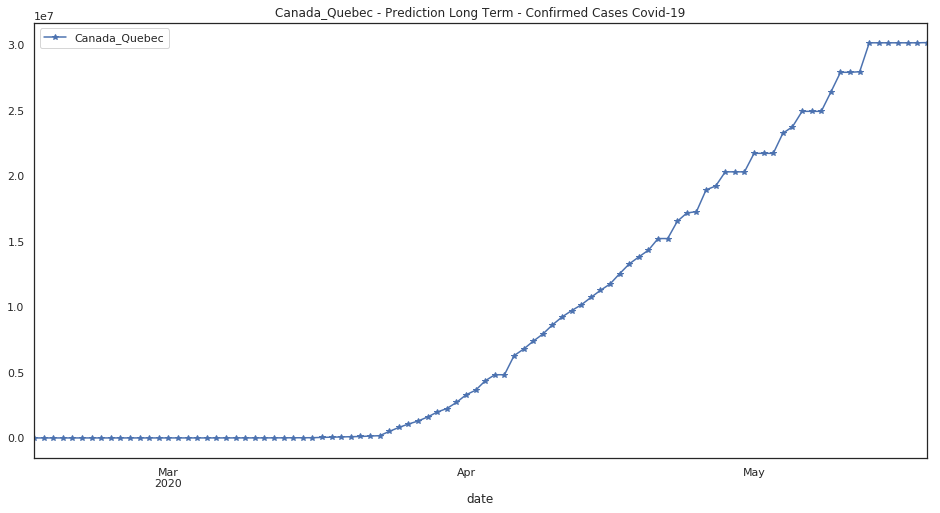

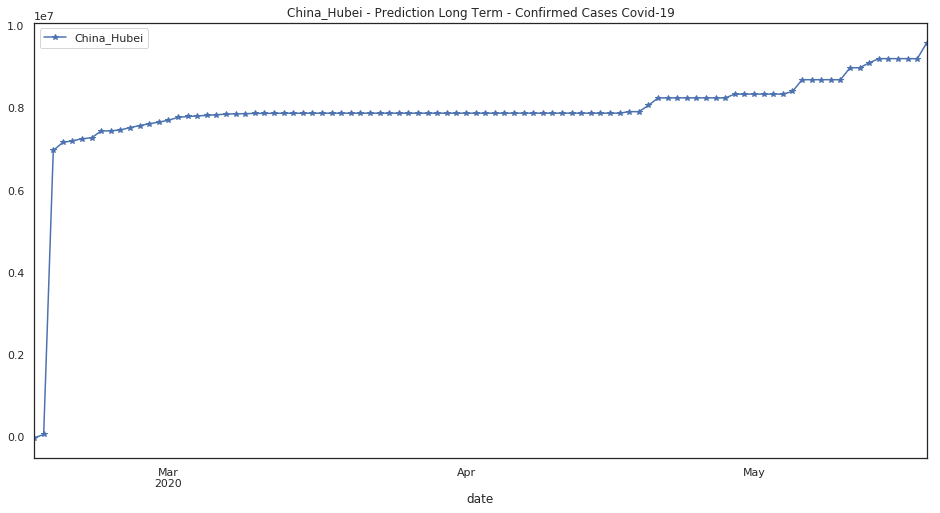

In [85]:
#
rgsx=['Italy_nan','Spain_nan','United States_nan','Switzerland_nan',
      'Germany_nan','United Kingdom_nan','France_nan','Iran_nan',
      'Sweden_nan','Netherlands_nan','Russia_nan','Poland_nan',
      'Brazil_nan','Turkey_nan','Japan_nan',
      'Portugal_nan','Canada_Ontario','Canada_Quebec','China_Hubei']
for i in range (1,len(rgsx)):
        rg_print=rgsx[i]
        pred_prg=pd.DataFrame()
        pred_prg=pred[rg_print]
        pred_prg.plot(marker='*',figsize=(16,8),title =rg_print+' - Prediction Long Term - Confirmed Cases Covid-19')
        plt.legend(loc = 'upper left')
        plt.show()
#

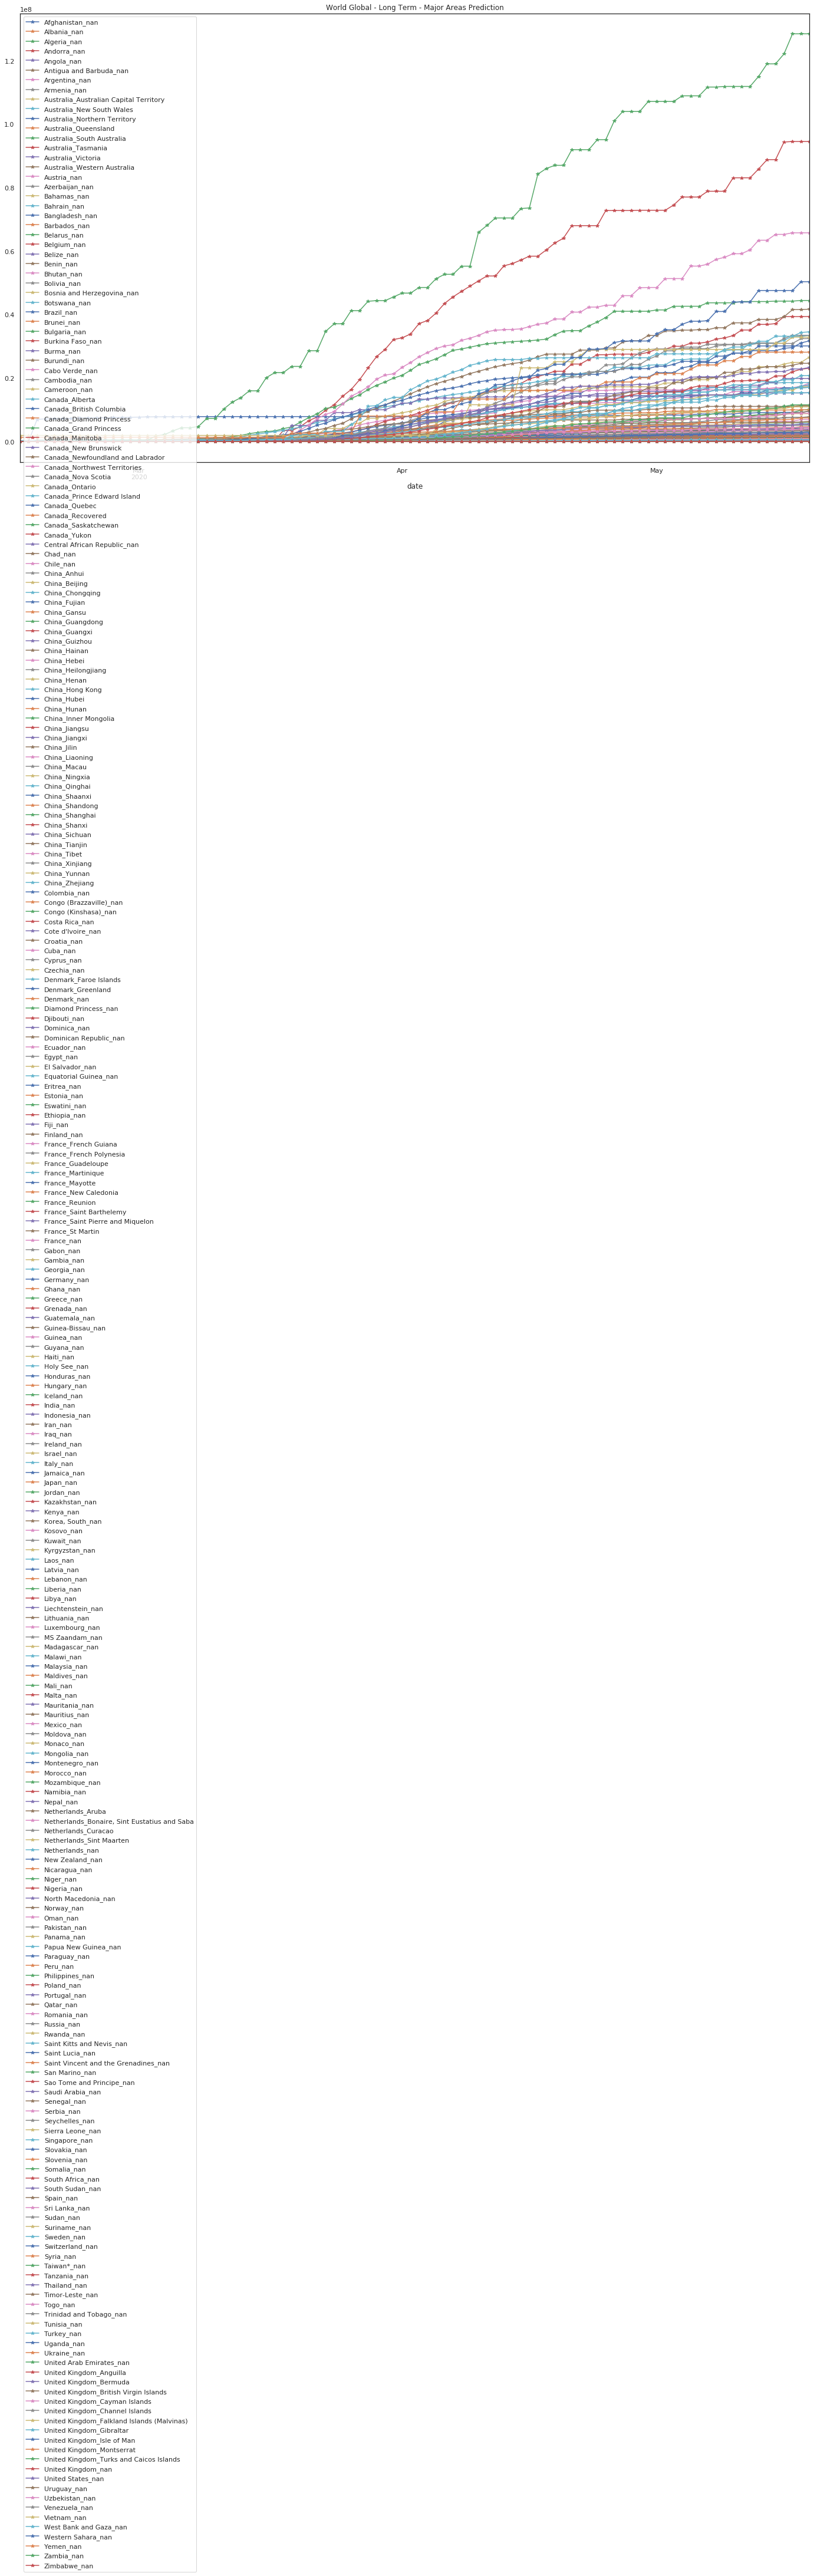

In [86]:
#region=my_train_list
pv2=pred
pv2.plot(marker='*',figsize=(24,14),title ='World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()


## Prediction Heatmap

In [87]:
pv1=pv2 #[1:] #p  #p2.append(p3).append(p4).append(p5).append(p6).append(p8).append(p9).append(p11)
p=pd.DataFrame(pv1)

In [88]:
p[45:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-04-01          33228.0     567857.0     117016.0   32682215.0   
2020-04-02          45184.0     605088.0     138386.0   33895862.0   
2020-04-03          52026.0     646968.0     161036.0   37190097.0   
2020-04-04          53535.0     709805.0     191281.0   38143668.0   
2020-04-05          56940.0     777298.0     204344.0   40484290.0   
2020-04-06          66437.0     842467.0     215596.0   43518451.0   
2020-04-07          69815.0     879710.0     232447.0   45599008.0   
2020-04-08          80452.0     893667.0     239732.0   47332817.0   
2020-04-09          84410.0     933235.0     256681.0   48979933.0   
2020-04-10          91986.0     954179.0     271994.0   50627040.0   
2020-04-11          99011.0     970458.0     287456.0   52187473.0   
2020-04-12         105447.0    1010018.0     297883.0   52187451.0   
2020-04-13         115294.0    1040262.0     312413.0   55394995.0   
2020-04-14         126296.0    1089138.0     323650.0   56088510.0   
2020-04-15         135564.0    1107753.0     337843.0   57215476.0   
2020-04-16         148845.0    1151967.0     352505.0   58429147.0   
2020-04-17         159455.0    1207825.0     370092.0   58429131.0   
2020-04-18         171973.0    1256708.0     394622.0   60423003.0   
2020-04-19         181097.0    1256702.0     394612.0   62590265.0   
2020-04-20         181069.0    1277653.0     394594.0   64063973.0   
2020-04-21         189999.0    1277650.0     401322.0   68051747.0   
2020-04-22         189947.0    1277627.0     401284.0   68051746.0   
2020-04-23         209113.0    1384701.0     404178.0   68051745.0   
2020-04-24         212128.0    1384692.0     412827.0   68051731.0   
2020-04-25         217605.0    1384685.0     412710.0   72819712.0   
2020-04-26         223271.0    1384695.0     436771.0   72819701.0   
2020-04-27         241703.0    1384692.0     436772.0   72819695.0   
2020-04-28         243969.0    1384676.0     436694.0   72819693.0   
2020-04-29         243967.0    1468476.0     460893.0   72906384.0   
2020-04-30         247921.0    1468447.0     482282.0   72906384.0   
2020-05-01         260637.0    1538280.0     493055.0   72906384.0   
2020-05-02         266705.0    1538280.0     493088.0   72906358.0   
2020-05-03         266676.0    1573194.0     493077.0   74553468.0   
2020-05-04         276356.0    1591822.0     493004.0   77067497.0   
2020-05-05         276353.0    1591822.0     526225.0   77067495.0   
2020-05-06         278033.0    1591808.0     526084.0   77067490.0   
2020-05-07         291342.0    1619733.0     553700.0   78888001.0   
2020-05-08         291317.0    1675590.0     553717.0   78888000.0   
2020-05-09         291260.0    1675588.0     553600.0   78887978.0   
2020-05-10         312374.0    1675586.0     596521.0   83135821.0   
2020-05-11         312345.0    1675588.0     596466.0   83135809.0   
2020-05-12         314391.0    1684899.0     607205.0   83135794.0   
2020-05-13         333801.0    1684899.0     607268.0   85909893.0   
2020-05-14         333748.0    1684895.0     607216.0   88857368.0   
2020-05-15         343783.0    1684869.0     607201.0   88857337.0   
2020-05-16         361239.0    1780309.0     619639.0   94405548.0   
2020-05-17         382483.0    1780295.0     619525.0   94578918.0   
2020-05-18         382460.0    1840818.0     628818.0   94578918.0   
2020-05-19         395390.0    1841180.0     643839.0   94579424.0   

region      Angola_nan  Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
date                                                                          
2020-04-01      5375.0                   5365.0       157800.0    1205444.0   
2020-04-02      6036.0                   5364.0       157762.0    1293623.0   
2020-04-03      6037.0                   6690.0       169534.0    1501708.0   
2020-04-04      6036.0            

In [89]:
p.to_csv('data/p+45_confirmed_daily.csv', index = False, header=True)

In [90]:
#!pip install gmplot
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [91]:
heatmap=confirmed[['region','Lat','Long']]
p_m=p.T # pred.T #
### JOAO - Change Global HeapMap print - USA is too small, as USA States datasets are not used! 
#heatmap=heatmap[heatmap['region'].isin(region)]  ## heatmap for region dataset only 
heatmap=heatmap[heatmap['region'].isin(confirmed['region'])] ## Global heatmap
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')

In [92]:
heatmap_m[:]

region        Lat        Long  \
0                                 Afghanistan_nan  33.000000   65.000000   
1                                     Albania_nan  41.153300   20.168300   
2                                     Algeria_nan  28.033900    1.659600   
3                                     Andorra_nan  42.506300    1.521800   
4                                      Angola_nan -11.202700   17.873900   
5                         Antigua and Barbuda_nan  17.060800  -61.796400   
6                                   Argentina_nan -38.416100  -63.616700   
7                                     Armenia_nan  40.069100   45.038200   
8          Australia_Australian Capital Territory -35.473500  149.012400   
9                       Australia_New South Wales -33.868800  151.209300   
10                   Australia_Northern Territory -12.463400  130.845600   
11                           Australia_Queensland -28.016700  153.400000   
12                      Australia_South Australia -34.928500  138.600700   
13                             Australia_Tasmania -41.454500  145.970700   
14                             Australia_Victoria -37.813600  144.963100   
15                    Australia_Western Australia -31.950500  115.860500   
16                                    Austria_nan  47.516200   14.550100   
17                                 Azerbaijan_nan  40.143100   47.576900   
18                                    Bahamas_nan  25.034300  -77.396300   
19                                    Bahrain_nan  26.027500   50.550000   
20                                 Bangladesh_nan  23.685000   90.356300   
21                                   Barbados_nan  13.193900  -59.543200   
22                                    Belarus_nan  53.709800   27.953400   
23                                    Belgium_nan  50.833300    4.000000   
24                                      Benin_nan   9.307700    2.315800   
25                                     Bhutan_nan  27.514200   90.433600   
26                                    Bolivia_nan -16.290200  -63.588700   
27                     Bosnia and Herzegovina_nan  43.915900   17.679100   
28                                     Brazil_nan -14.235000  -51.925300   
29                                     Brunei_nan   4.535300  114.727700   
..                                            ...        ...         ...   
237                                Mozambique_nan -18.665695   35.529562   
238                                     Syria_nan  34.802075   38.996815   
239                               Timor-Leste_nan  -8.874217  125.727539   
240                                    Belize_nan  13.193900  -59.543200   
241                              Canada_Recovered   0.000000    0.000000   
242                                      Laos_nan  19.856270  102.495496   
243                                     Libya_nan  26.335100   17.228331   
244                        West Bank and Gaza_nan  31.952200   35.233200   
245                             Guinea-Bissau_nan  11.803700  -15.180400   
246                                      Mali_nan  17.570692   -3.996166   
247                     Saint Kitts and Nevis_nan  17.357822  -62.782998   
248                  Canada_Northwest Territories  64.825500 -124.845700   
249                                  Canada_Yukon  64.282300 -135.000000   
250                                    Kosovo_nan  42.602636   20.902977   
251                                     Burma_nan  21.916200   95.956000   
252                       United Kingdom_Anguilla  18.220600  -63.068600   
253         United Kingdom_British Virgin Islands  18.420700  -64.640000   
254       United Kingdom_Turks and Caicos Islands  21.694000  -71.797900   
255                                MS Zaandam_nan   0.000000    0.000000   
256                                  Botswana_nan -22.328500   24.684900   
257                                   Burundi_nan  -3.373100   29.918900   
258            

In [93]:
heatmap=pd.DataFrame()
vmaxni=len(heatmap_m)
vmaxnii=(vmaxni)-2
for i in range(0,len(heatmap)):
    if heatmap_m.iloc[i,vmaxni].astype(int)==0:     #### heatmap_m.iloc[i,61] # heatmap_m.iloc[i,9] columns is the date we want to check
        continue
    #heatmap=heatmap.append(pd.concat([heatmap_m.iloc[i:(i+1),1:3]]*abs(heatmap_m.iloc[i,(i+1)].astype(int)), ignore_index=True,sort=False)) 
    heatmap=heatmap.append(pd.concat([heatmap_m.iloc[i:(i+1),1:vmaxnii]]*abs(heatmap_m.iloc[i:(i+1),1:vmaxnii].astype(int)), ignore_index=True,sort=False)) 


In [94]:
### Joao - Print in datetime
from datetime import datetime
#
latitudes = heatmap_m['Lat']
longitudes = heatmap_m['Long']
# Creating the location we would like to initialize the focus on. 
# Parameters: Lattitude, Longitude, Zoom
heatmap=heatmap_m
gmap = gmplot.GoogleMapPlotter(46.99474,6.87237, 4)
gmap.heatmap(latitudes, longitudes)
datemap=datetime.today().strftime('%Y-%m-%d')
# Generate the heatmap into an HTML file
gmap.draw("heatmaps/Heatmap-"+datemap+".html")

In [95]:
print("Stats and Forecast Done for Today!")
print("I'm done with this past month of March and now April!")
print(" April-May-June are going to be hard with this Global Lock-Down!")

Stats and Forecast Done for Today!
I'm done with this past month of March and now April!
 April-May-June are going to be hard with this Global Lock-Down!


In [96]:
exit()

H2O session _sid_a80e closed.


ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.
